In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

# dataset
df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

sub_id_accuracy_score = []

# Iterate through SubID values from 1 to 10
for sub_id in range(1, 11):
    filtered_data = df[(df['SubID'] == sub_id) & (df['Part'] == 1)].copy()
    
    if len(filtered_data) == 120:

        filtered_data.loc[:, 'newOutcomeArray'] = filtered_data['outcomeArrayEXP'].replace(-1, 0)
        
        total_score = filtered_data['newOutcomeArray'].sum()
        
        accuracy_score = (total_score / len(filtered_data['outcomeArrayEXP']))
        sub_id_accuracy_score.append(accuracy_score)
    else:
        sub_id_accuracy_score.append("Invalid Data")

# accuracy scores for each participant
for i, score in enumerate(sub_id_accuracy_score):
    if score != "Invalid Data":
        print(f"Participant {i + 1} Accuracy Score: {score:.2f}")
    else:
        print(f"Participant {i + 1} has invalid data.")

# median accuracy score
median_accuracy = np.median([score for score in sub_id_accuracy_score if score != "Invalid Data"])

# two groups based on the median accuracy score - low and good learners 
good_participants = [i + 1 for i, score in enumerate(sub_id_accuracy_score) if score != "Invalid Data" and score >= median_accuracy]
low_participants = [i + 1 for i, score in enumerate(sub_id_accuracy_score) if score != "Invalid Data" and score < median_accuracy]

print("Good Participants:", good_participants)
print("Low Participants:", low_participants)

Participant 1 Accuracy Score: 0.74
Participant 2 Accuracy Score: 0.57
Participant 3 Accuracy Score: 0.68
Participant 4 Accuracy Score: 0.66
Participant 5 Accuracy Score: 0.73
Participant 6 Accuracy Score: 0.57
Participant 7 Accuracy Score: 0.73
Participant 8 Accuracy Score: 0.74
Participant 9 Accuracy Score: 0.66
Participant 10 Accuracy Score: 0.72
Good Participants: [1, 5, 7, 8, 10]
Low Participants: [2, 3, 4, 6, 9]


Good Participants: [1, 5, 7, 8, 10]
Low Participants: [2, 3, 4, 6, 9]

In [13]:
from scipy import stats

# accuracy scores for low and good learners 
good_accuracy_scores = [score for i, score in enumerate(sub_id_accuracy_score) if i + 1 in good_participants]
low_accuracy_scores = [score for i, score in enumerate(sub_id_accuracy_score) if i + 1 in low_participants]

# independent two-sample t-test
t_statistic, p_value = stats.ttest_ind(good_accuracy_scores, low_accuracy_scores)

alpha = 0.05

print("Independent Two-Sample T-Test Results:")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference between the groups.")


Independent Two-Sample T-Test Results:
t-statistic: 4.2109
p-value: 0.0030
Reject the null hypothesis: There is a statistically significant difference between the groups.


In [19]:
from scipy import stats
from tabulate import tabulate

# Create a table
table = [
    ["Independent Two-Sample T-Test Results", ""],
    ["t-statistic", f"{t_statistic:.4f}"],
    ["p-value", f"{p_value:.4f}"],
]

if p_value < alpha:
    conclusion = "Reject the null hypothesis: There is a statistically significant difference between the groups."
else:
    conclusion = "Fail to reject the null hypothesis: There is no statistically significant difference between the groups."

table.append(["Conclusion", conclusion])

print(tabulate(table, tablefmt="pretty"))


+---------------------------------------+-------------------------------------------------------------------------------------------------+
| Independent Two-Sample T-Test Results |                                                                                                 |
|              t-statistic              |                                             6.1678                                              |
|                p-value                |                                             0.0003                                              |
|              Conclusion               | Reject the null hypothesis: There is a statistically significant difference between the groups. |
+---------------------------------------+-------------------------------------------------------------------------------------------------+


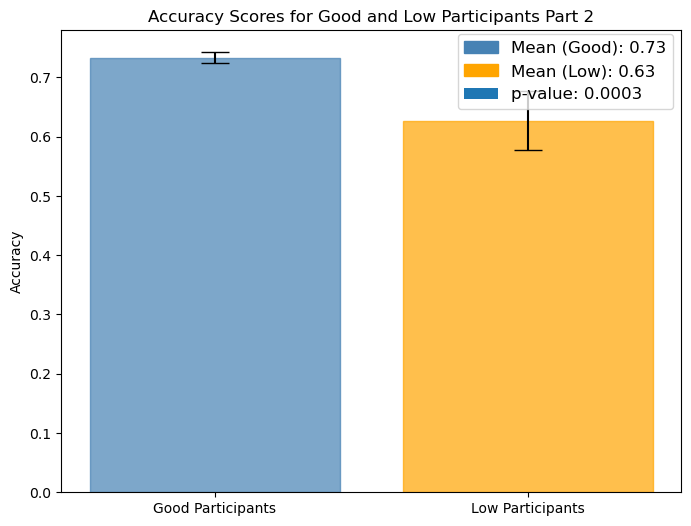

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

good_accuracy_scores = [score for i, score in enumerate(sub_id_accuracy_score) if i + 1 in good_participants]
low_accuracy_scores = [score for i, score in enumerate(sub_id_accuracy_score) if i + 1 in low_participants]
labels = ['Good Participants', 'Low Participants']

data = [good_accuracy_scores, low_accuracy_scores]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, [np.mean(scores) for scores in data], yerr=[np.std(scores) for scores in data], capsize=10, alpha=0.7)

plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Good and Low Participants Part 2')

colors = ['steelblue', 'orange']
for bar, color in zip(bars, colors):
    bar.set_color(color)

# means of low and good learners
mean_good = np.mean(good_accuracy_scores)
mean_low = np.mean(low_accuracy_scores)

p_value_text = f'p-value: {p_value:.4f}'
legend_handles = [
    mpatches.Patch(color='steelblue', label=f'Mean (Good): {mean_good:.2f}'),
    mpatches.Patch(color='orange', label=f'Mean (Low): {mean_low:.2f}'),
    mpatches.Patch(label=p_value_text)
]

legend = plt.legend(handles=legend_handles, loc='upper right', fontsize=12, frameon=True, bbox_to_anchor=(1.0, 1.01))
legend.get_frame().set_facecolor('white')
plt.show()


### PLot from the MEDIUM Guy that doesnt really work - too little data but would be nice ###
https://medium.com/mlearning-ai/getting-started-with-raincloud-plots-in-python-2ea5c2d01c11

Participant 1 Accuracy Score: 0.74
Participant 2 Accuracy Score: 0.57
Participant 3 Accuracy Score: 0.68
Participant 4 Accuracy Score: 0.66
Participant 5 Accuracy Score: 0.73
Participant 6 Accuracy Score: 0.57
Participant 7 Accuracy Score: 0.73
Participant 8 Accuracy Score: 0.74
Participant 9 Accuracy Score: 0.66
Participant 10 Accuracy Score: 0.72


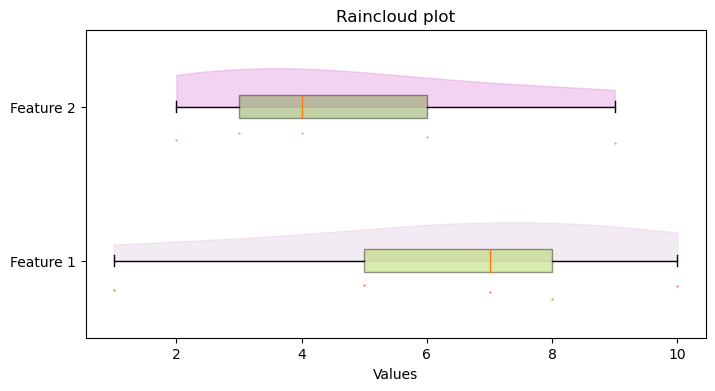

In [8]:
import numpy as np
import matplotlib.pyplot as plt


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
# from MEDIUM Guy who plots nice rainbow plots 
# Load the dataset
df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

sub_id_accuracy_score = []

# Iterate through SubID values from 1 to 10
for sub_id in range(1, 11):
    filtered_data = df[(df['SubID'] == sub_id) & (df['Part'] == 1)].copy()
    
    # Check if there are 120 rows for each participant
    if len(filtered_data) == 120:
        # Create a new variable that replaces -1 with 0
        filtered_data.loc[:, 'newOutcomeArray'] = filtered_data['outcomeArrayEXP'].replace(-1, 0)
        
        # Calculate the total score for the newOutcomeArray
        total_score = filtered_data['newOutcomeArray'].sum()
        
        # Calculate accuracy score as a percentage
        accuracy_score = (total_score / len(filtered_data['outcomeArrayEXP']))
        sub_id_accuracy_score.append(accuracy_score)
    else:
        # If there are not 120 rows, mark it as invalid data
        sub_id_accuracy_score.append("Invalid Data")

# Print the accuracy scores for each participant
for i, score in enumerate(sub_id_accuracy_score):
    if score != "Invalid Data":
        print(f"Participant {i + 1} Accuracy Score: {score:.2f}")
    else:
        print(f"Participant {i + 1} has invalid data.")

# Calculate the median accuracy score
median_accuracy = np.median([score for score in sub_id_accuracy_score if score != "Invalid Data"])


# Create two groups based on the median accuracy score
good_participants = [i + 1 for i, score in enumerate(sub_id_accuracy_score) if score != "Invalid Data" and score >= median_accuracy]
low_participants = [i + 1 for i, score in enumerate(sub_id_accuracy_score) if score != "Invalid Data" and score < median_accuracy]

good_learners = good_participants
bad_learners = low_participants

learners = [good_learners, bad_learners]

fig, ax = plt.subplots(figsize=(8, 4))

# Create a list of colors for the boxplots based on the number of features you have
boxplots_colors = ['yellowgreen', 'olivedrab']

# Boxplot data
bp = ax.boxplot(learners, patch_artist = True, vert = False)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)

# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['thistle', 'orchid']

# Violinplot data
vp = ax.violinplot(learners, points=500, 
               showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    b.set_color(violin_colors[idx])

# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['tomato', 'darksalmon']

# Scatterplot data
for idx, features in enumerate(learners):
    # Add jitter effect so the features do not overlap on the y-axis
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    plt.scatter(features, y, s=.3, c=scatter_colors[idx])

plt.yticks(np.arange(1,3,1), ['Feature 1', 'Feature 2'])  
plt.xlabel('Values')
plt.title("Raincloud plot")
plt.show()



In [55]:
# for Part 2, which is the ES Phase

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')
sub_id_accuracy_score = []
sub_id_total_scores = []

for sub_id in range(1, 11):
    filtered_data = df[df['SubID'] == sub_id].copy()
    
    if len(filtered_data) == 840:
        filtered_data.loc[:, 'newOutcomeArray'] = filtered_data['utility_ArrayEXP2'].replace(-1, 0)
        total_score = filtered_data['newOutcomeArray'].sum()
        sub_id_total_scores.append(total_score)
        accuracy_score = (total_score / len(filtered_data['newOutcomeArray']))
        sub_id_accuracy_score.append(accuracy_score)
    else:
        sub_id_accuracy_score.append("Invalid Data")

    
for i, score in enumerate(sub_id_accuracy_score):
    if score != "Invalid Data":
        print(f"Participant {i + 1} Accuracy Score: {score:.2f}")
    
median_accuracy = np.median([score for score in sub_id_accuracy_score if score != "Invalid Data"])

good_participants = [i + 1 for i, score in enumerate(sub_id_accuracy_score) if score >= median_accuracy]
low_participants = [i + 1 for i, score in enumerate(sub_id_accuracy_score) if score < median_accuracy]

print("Good Participants:", good_participants)
print("Low Participants:", low_participants)


# this score is technically right but we could exclude trials where both left and right images had the same probability

Participant 1 Accuracy Score: 0.77
Participant 2 Accuracy Score: 0.73
Participant 3 Accuracy Score: 0.61
Participant 4 Accuracy Score: 0.65
Participant 5 Accuracy Score: 0.65
Participant 6 Accuracy Score: 0.70
Participant 7 Accuracy Score: 0.77
Participant 8 Accuracy Score: 0.80
Participant 9 Accuracy Score: 0.79
Participant 10 Accuracy Score: 0.67
Good Participants: [1, 2, 7, 8, 9]
Low Participants: [3, 4, 5, 6, 10]


In [56]:
import pandas as pd
import numpy as np



sub_id_accuracy_score = []
sub_id_total_scores = []

for sub_id in range(1, 11):
    filtered_data = df[df['SubID'] == sub_id].copy()
    
    if len(filtered_data) == 840:
        # Filter out trials where left and right probabilities are the same
        filtered_data = filtered_data[filtered_data['left_probabilityEXP2'] != filtered_data['right_probabilityEXP2']]
        
        filtered_data.loc[:, 'newOutcomeArray'] = filtered_data['utility_ArrayEXP2'].replace(-1, 0)
        
        total_score = filtered_data['newOutcomeArray'].sum()
        sub_id_total_scores.append(total_score)

        accuracy_score = (total_score / len(filtered_data['newOutcomeArray']))
        sub_id_accuracy_score.append(accuracy_score)
    else:
        sub_id_accuracy_score.append("Invalid Data")

    

for i, score in enumerate(sub_id_accuracy_score):
    if score != "Invalid Data":
        print(f"Participant {i + 1} Accuracy Score: {score:.2f}")

median_accuracy = np.median([score for score in sub_id_accuracy_score if score != "Invalid Data"])

good_participants = [i + 1 for i, score in enumerate(sub_id_accuracy_score) if score >= median_accuracy]
low_participants = [i + 1 for i, score in enumerate(sub_id_accuracy_score) if score < median_accuracy]
print("Good Participants:", good_participants)
print("Low Participants:", low_participants)


Participant 1 Accuracy Score: 0.90
Participant 2 Accuracy Score: 0.85
Participant 3 Accuracy Score: 0.72
Participant 4 Accuracy Score: 0.76
Participant 5 Accuracy Score: 0.75
Participant 6 Accuracy Score: 0.82
Participant 7 Accuracy Score: 0.90
Participant 8 Accuracy Score: 0.93
Participant 9 Accuracy Score: 0.92
Participant 10 Accuracy Score: 0.78
Good Participants: [1, 2, 7, 8, 9]
Low Participants: [3, 4, 5, 6, 10]


In [26]:
from scipy import stats
from tabulate import tabulate

good_accuracy_scores = [score for i, score in enumerate(sub_id_accuracy_score) if i + 1 in good_participants]
low_accuracy_scores = [score for i, score in enumerate(sub_id_accuracy_score) if i + 1 in low_participants]

t_statistic, p_value = stats.ttest_ind(good_accuracy_scores, low_accuracy_scores)

alpha = 0.05

table = [
    ["Independent Two-Sample T-Test Results", ""],
    ["t-statistic", f"{t_statistic:.4f}"],
    ["p-value", f"{p_value:.4f}"],
]

if p_value < alpha:
    conclusion = "Reject the null hypothesis: There is a statistically significant difference between the groups."
else:
    conclusion = "Fail to reject the null hypothesis: There is no statistically significant difference between the groups."

table.append(["Conclusion", conclusion])
print(tabulate(table, tablefmt="pretty"))


+---------------------------------------+-------------------------------------------------------------------------------------------------+
| Independent Two-Sample T-Test Results |                                                                                                 |
|              t-statistic              |                                             6.1678                                              |
|                p-value                |                                             0.0003                                              |
|              Conclusion               | Reject the null hypothesis: There is a statistically significant difference between the groups. |
+---------------------------------------+-------------------------------------------------------------------------------------------------+


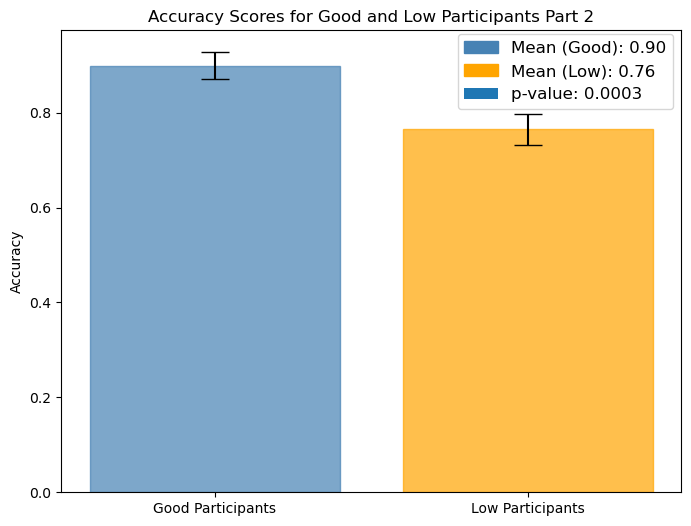

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


labels = ['Good Participants', 'Low Participants']

data = [good_accuracy_scores, low_accuracy_scores]

# bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, [np.mean(scores) for scores in data], yerr=[np.std(scores) for scores in data], capsize=10, alpha=0.7)

plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Good and Low Participants Part 2')

colors = ['steelblue', 'orange']
for bar, color in zip(bars, colors):
    bar.set_color(color)
mean_good = np.mean(good_accuracy_scores)
mean_low = np.mean(low_accuracy_scores)
p_value_text = f'p-value: {p_value:.4f}'
legend_handles = [
    mpatches.Patch(color='steelblue', label=f'Mean (Good): {mean_good:.2f}'),
    mpatches.Patch(color='orange', label=f'Mean (Low): {mean_low:.2f}'),
    mpatches.Patch(label=p_value_text)
]

legend = plt.legend(handles=legend_handles, loc='upper right', fontsize=12, frameon=True, bbox_to_anchor=(1.0, 1.01))
legend.get_frame().set_facecolor('white')
plt.show()


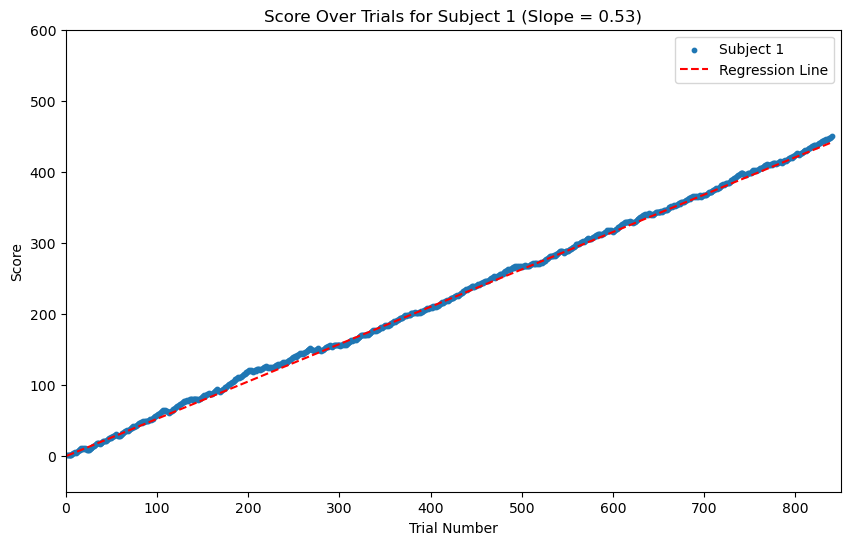

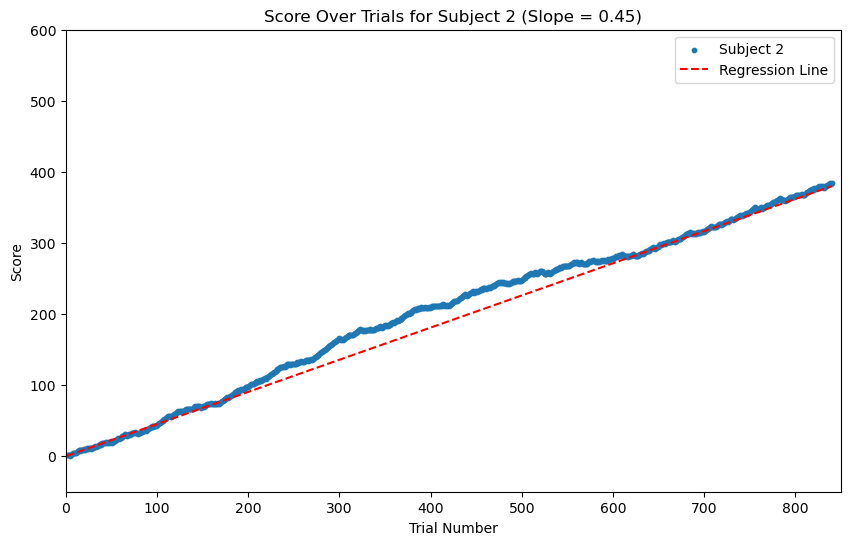

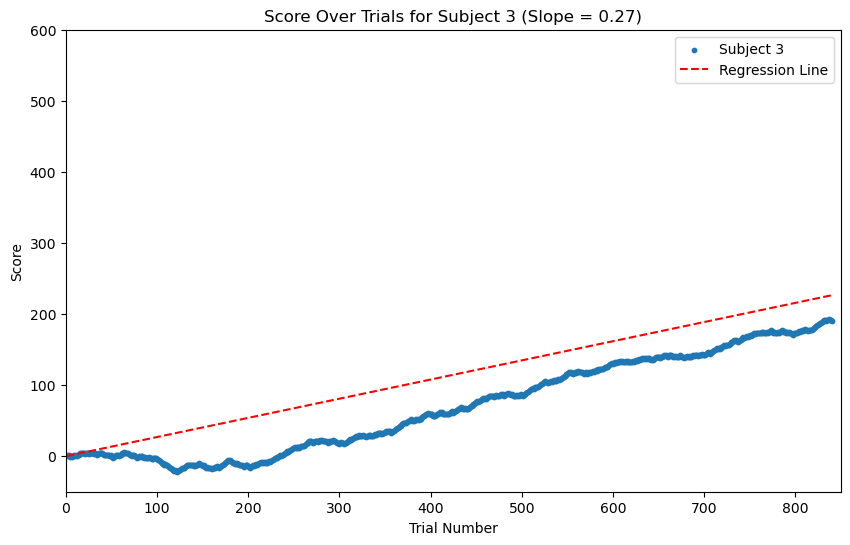

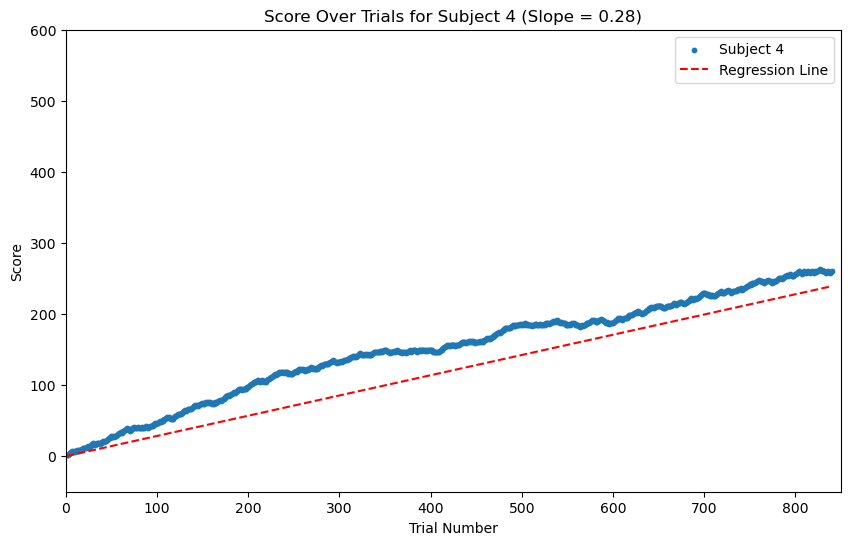

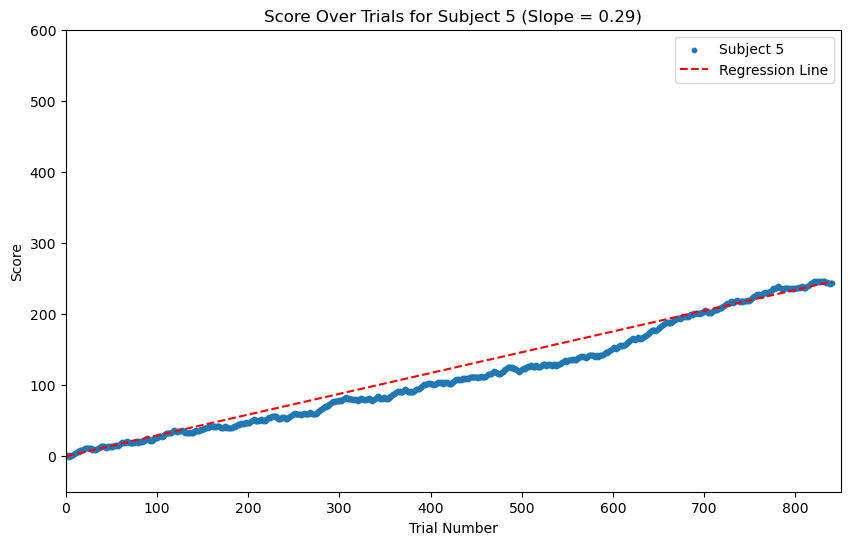

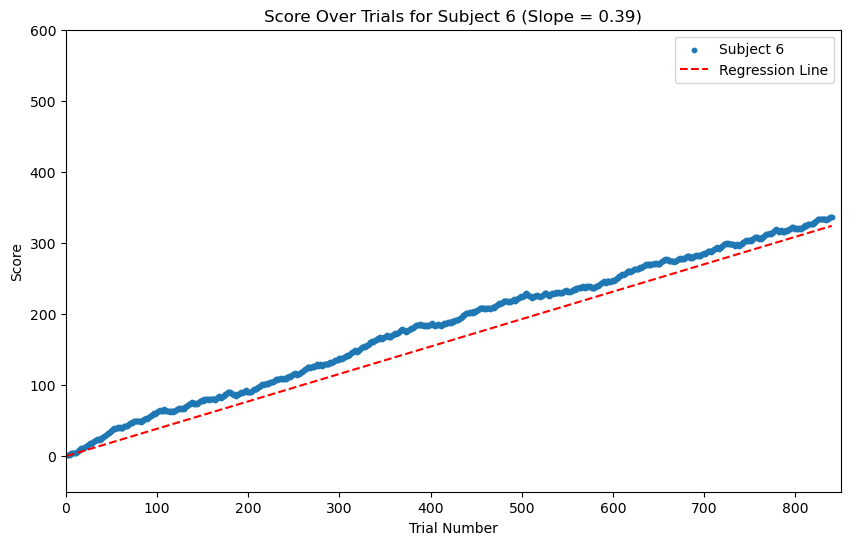

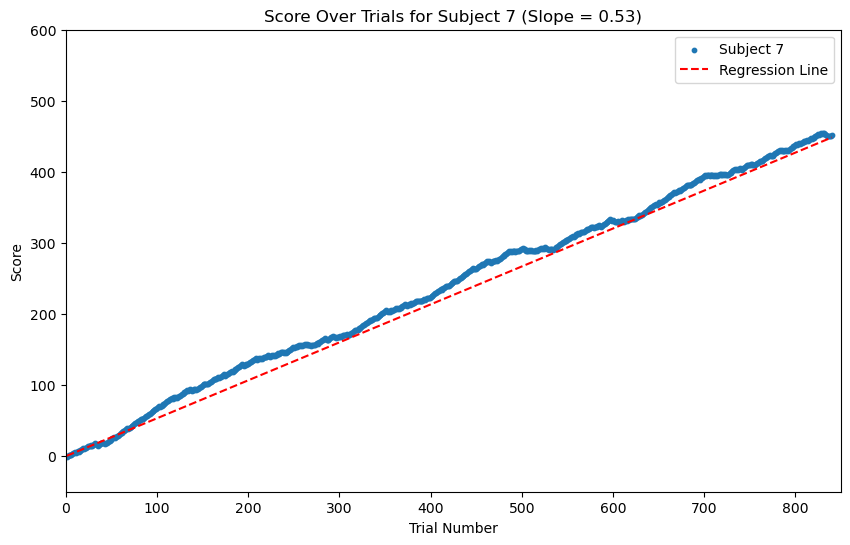

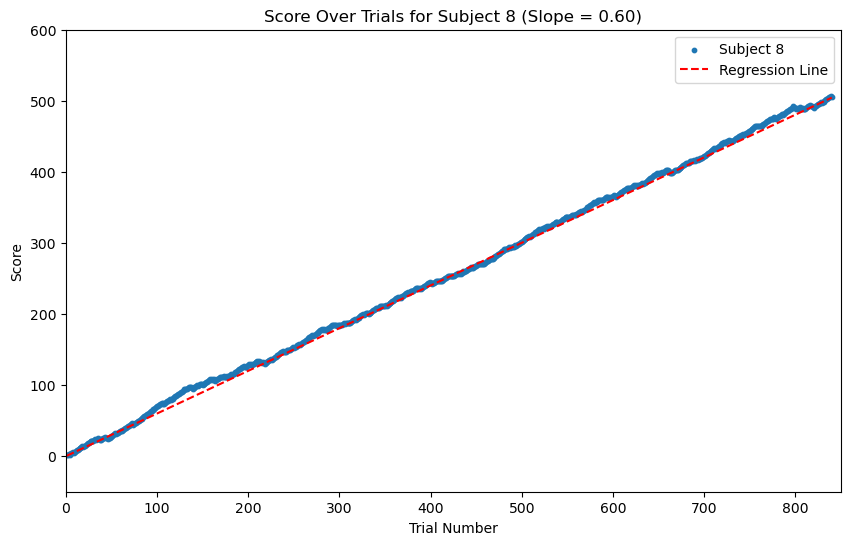

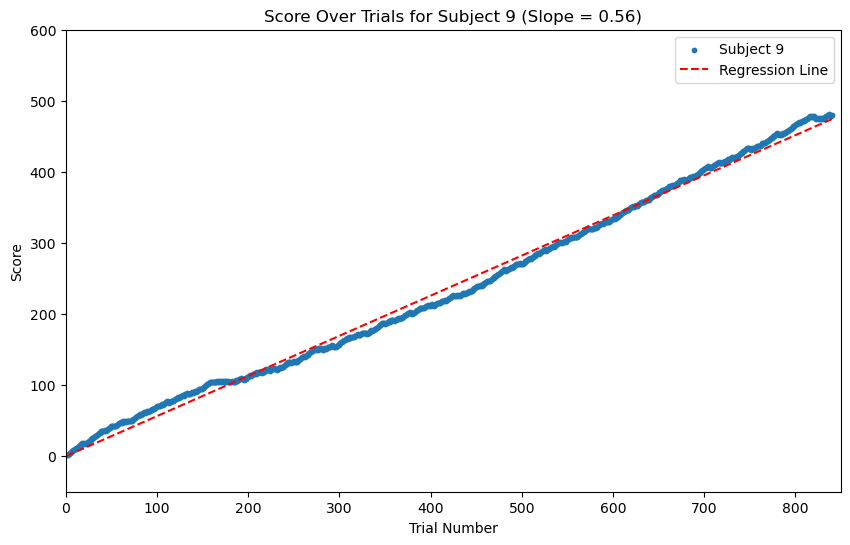

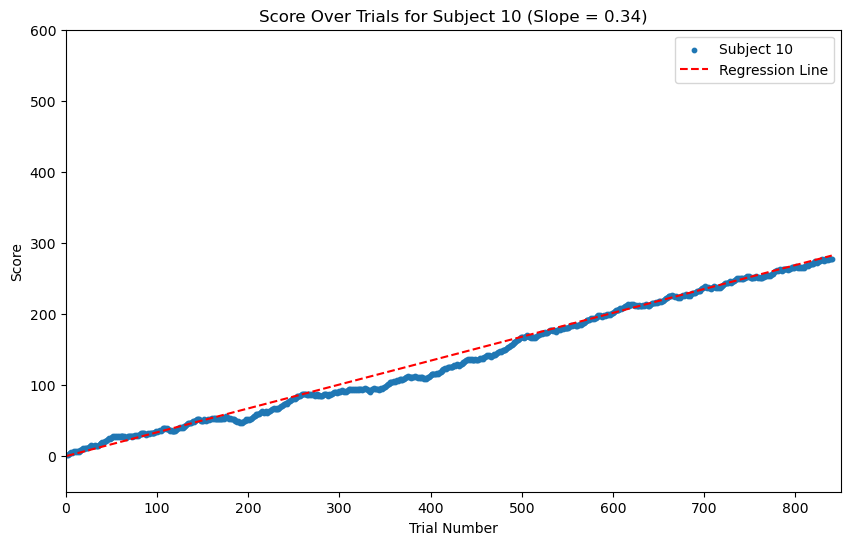

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

data = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

max_trials = 840

for sub_id in range(1, 11):
    subject_data = data[data['SubID'] == sub_id]
    trial_numbers = range(1, max_trials + 1)
    subject_scores = subject_data['scoreArrayEXP2']
    
    # linear regression for participant
    slope, _, _, _, _ = linregress(trial_numbers, subject_scores)
    
    
    #plot for current participant
    plt.figure(figsize=(10, 6))
    plt.scatter(trial_numbers, subject_scores, label=f'Subject {sub_id}', marker='o', s=10)
    
    #regression line
    y_pred = slope * trial_numbers
    plt.plot(trial_numbers, y_pred, color='red', linestyle='--', label='Regression Line')
    
    plt.xlabel('Trial Number')
    plt.ylabel('Score')
    plt.ylim(-50,600)
    plt.xlim(0,850)
    plt.title(f'Score Over Trials for Subject {sub_id} (Slope = {slope:.2f})')
    plt.legend()
    plt.show()


In [50]:
import pandas as pd
import numpy as np
from scipy.stats import linregress

slopes = []
intercept = []
r_value = []
p_value = []
std_err = []

for sub_id in range(1, 11):
    subject_data = data[data['SubID'] == sub_id]
    trial_numbers = subject_data['Trial_Num']
    subject_scores = subject_data['scoreArrayEXP2']
    
    slope,_,_,_,_= linregress(trial_numbers, subject_scores)
    
    slopes.append({'SubID': sub_id, 'Slope': slope})
    intercept.append({'SubID': sub_id, 'intercept': intercept})
    r_value.append({'SubID': sub_id, 'r_value': r_value})
    p_value.append({'SubID': sub_id, 'p_value': p_value})
    std_err.append({'SubID': sub_id, 'std_error': std_err})

for slope_info in slopes:
    print(f"Subject ID: {slope_info['SubID']}, Slope: {slope_info['Slope']}")


Subject ID: 1, Slope: 0.5256617022254445
Subject ID: 2, Slope: 0.4523047995897305
Subject ID: 3, Slope: 0.2696028885690436
Subject ID: 4, Slope: 0.28474240629997655
Subject ID: 5, Slope: 0.29249286270044517
Subject ID: 6, Slope: 0.3857947846945847
Subject ID: 7, Slope: 0.5338276313559726
Subject ID: 8, Slope: 0.6005129987834046
Subject ID: 9, Slope: 0.5644956169965417
Subject ID: 10, Slope: 0.3360271607122864


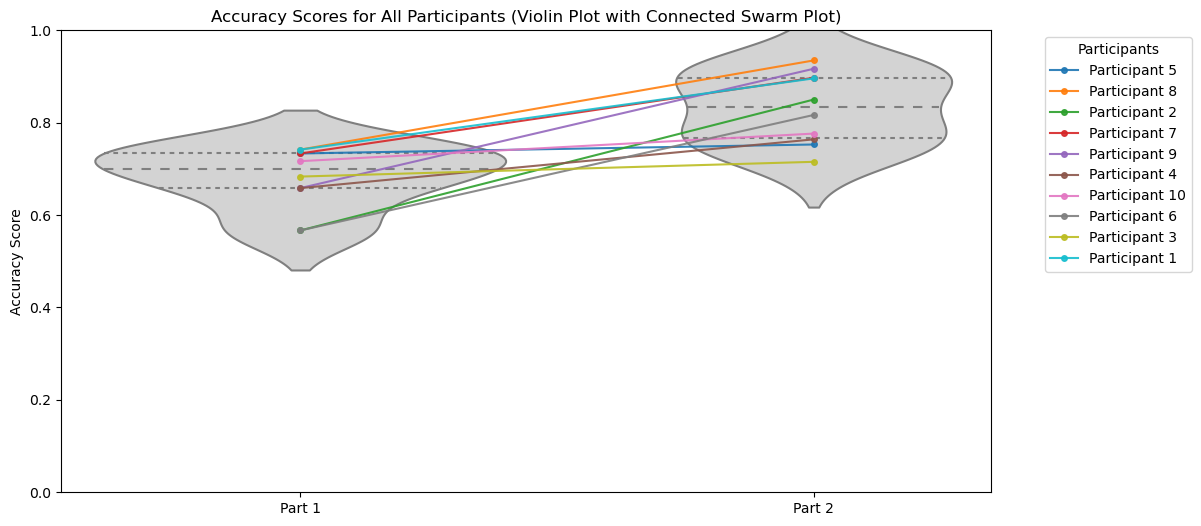

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# datasets for Code 1 and Code 2
df1 = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')
df2 = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

sub_id_accuracy_score1 = []
sub_id_accuracy_score2 = []
participant_ids = []

for sub_id in range(1, 11):
    filtered_data = df1[(df1['SubID'] == sub_id) & (df1['Part'] == 1)].copy()
    
    if len(filtered_data) == 120:
        filtered_data.loc[:, 'newOutcomeArray'] = filtered_data['outcomeArrayEXP'].replace(-1, 0)
        
        total_score = filtered_data['newOutcomeArray'].sum()
        
        accuracy_score = (total_score / len(filtered_data['outcomeArrayEXP']))
        sub_id_accuracy_score1.append(accuracy_score)
        participant_ids.append(sub_id)

for sub_id in range(1, 11):
    filtered_data = df2[df2['SubID'] == sub_id].copy()
    # Filter out trials where left and right probabilities are the same
    filtered_data = filtered_data[filtered_data['left_probabilityEXP2'] != filtered_data['right_probabilityEXP2']]
    filtered_data.loc[:, 'newOutcomeArray'] = filtered_data['utility_ArrayEXP2'].replace(-1, 0)
    total_score = filtered_data['newOutcomeArray'].sum()
    accuracy_score = (total_score / len(filtered_data['newOutcomeArray']))
    sub_id_accuracy_score2.append(accuracy_score)
    
combined_accuracy_scores = [sub_id_accuracy_score1, sub_id_accuracy_score2]

# function to connect data points to see how the participant develops from LE phase to ES phase - Other Medium Guy 
def connect_data_points(x, y, hue, palette):
    unique_hues = list(set(hue))
    for unique_hue in unique_hues:
        x_values = [x[i] for i in range(len(x)) if hue[i] == unique_hue]
        y_values = [y[i] for i in range(len(y)) if hue[i] == unique_hue]
        plt.plot(x_values, y_values, marker='o', linestyle='-', markersize=4, label=unique_hue, alpha=0.9)

# connected swarm plot for accuracy scores
plt.figure(figsize=(12, 6))

# Plot violin plots for Code 1 and Code 2
sns.violinplot(x=["Part 1"] * 10 + ["Part 2"] * 10, y=combined_accuracy_scores[0] + combined_accuracy_scores[1], 
               inner="quartiles", color="lightgray")

# Connected data points for Code 1 and Code 2
connect_data_points(["Part 1"] * 10 + ["Part 2"] * 10, 
                    combined_accuracy_scores[0] + combined_accuracy_scores[1], 
                    hue=["Participant " + str(i) for i in participant_ids] * 2, 
                    palette=sns.color_palette("Set1", len(participant_ids)))

plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for All Participants (Violin Plot with Connected Swarm Plot)')
plt.ylim(0, 1)  
plt.legend(title="Participants", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


##  NOT filtering out 50/50 trials gives us.... ##

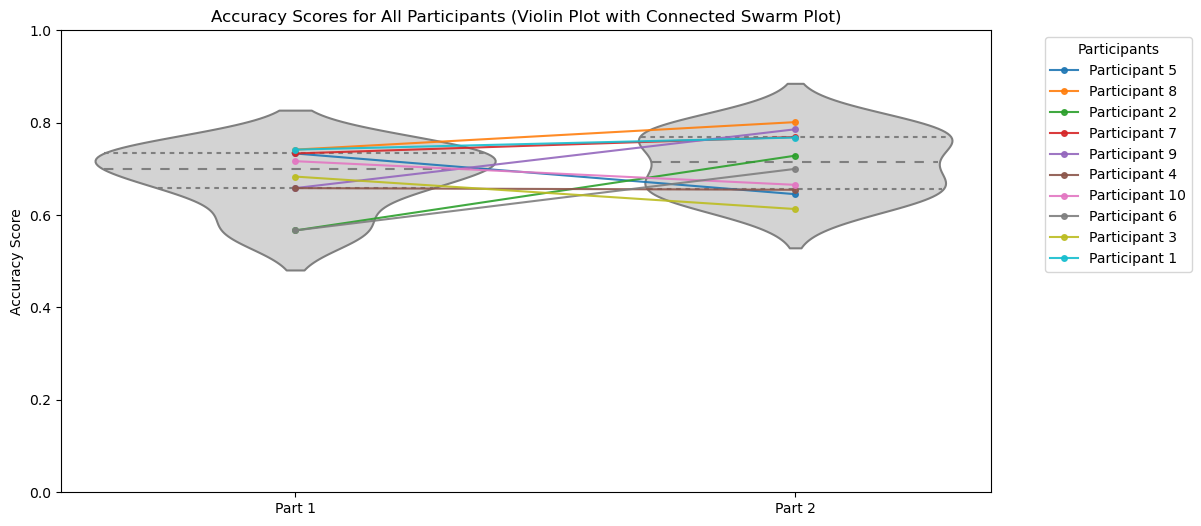

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')
df2 = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')
sub_id_accuracy_score1 = []
sub_id_accuracy_score2 = []
participant_ids = []

for sub_id in range(1, 11):
    filtered_data = df1[(df1['SubID'] == sub_id) & (df1['Part'] == 1)].copy()
    
    if len(filtered_data) == 120:
        filtered_data.loc[:, 'newOutcomeArray'] = filtered_data['outcomeArrayEXP'].replace(-1, 0)
        total_score = filtered_data['newOutcomeArray'].sum()        
        accuracy_score = (total_score / len(filtered_data['outcomeArrayEXP']))
        sub_id_accuracy_score1.append(accuracy_score)
        participant_ids.append(sub_id)
    
for sub_id in range(1, 11):
    filtered_data = df2[df2['SubID'] == sub_id].copy()
    filtered_data.loc[:, 'newOutcomeArray'] = filtered_data['utility_ArrayEXP2'].replace(-1, 0)        
    total_score = filtered_data['newOutcomeArray'].sum()    
    accuracy_score = (total_score / len(filtered_data['newOutcomeArray']))
    sub_id_accuracy_score2.append(accuracy_score)
    
combined_accuracy_scores = [sub_id_accuracy_score1, sub_id_accuracy_score2]

# Medium guy function 
def connect_data_points(x, y, hue, palette):
    unique_hues = list(set(hue))
    for unique_hue in unique_hues:
        x_values = [x[i] for i in range(len(x)) if hue[i] == unique_hue]
        y_values = [y[i] for i in range(len(y)) if hue[i] == unique_hue]
        plt.plot(x_values, y_values, marker='o', linestyle='-', markersize=4, label=unique_hue, alpha=0.9)

plt.figure(figsize=(12, 6))

sns.violinplot(x=["Part 1"] * 10 + ["Part 2"] * 10, y=combined_accuracy_scores[0] + combined_accuracy_scores[1], 
               inner="quartiles", color="lightgray")

connect_data_points(["Part 1"] * 10 + ["Part 2"] * 10, 
                    combined_accuracy_scores[0] + combined_accuracy_scores[1], 
                    hue=["Participant " + str(i) for i in participant_ids] * 2, 
                    palette=sns.color_palette("Set1", len(participant_ids)))

plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for All Participants (Violin Plot with Connected Swarm Plot)')
plt.ylim(0, 1)  
plt.legend(title="Participants", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Can we predict participants accuracy in EXP2 from their choice accuracy in EXP1??
- we can't really, good and bad participants are not the same in LE phase and ES phase, experimenting and failing much in the complete feedback LE phase is not a predictor of later accuracy score in ES phase as we can see by the connected data points


In [47]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, jaccard_score, f1_score, log_loss
from sklearn.model_selection import train_test_split

df1 = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')
df2 = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

df1.loc[:, 'newOutcomeArray'] = df1['outcomeArrayEXPAll'].replace(-1, 0)
df2.loc[:, 'newUtilityArray'] = df2['utility_ArrayEXP2'].replace(-1, 0)

# training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1[['newOutcomeArray']], df2['newUtilityArray'], test_size=0.2, random_state=42)

# SVM kernels that we can test
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

for kernel in kernels:
    model = SVC(kernel=kernel, random_state=42, probability=True)
    model.fit(X_train, y_train)
    
    y_pred_test = model.predict(X_test)
    y_pred_proba_test = model.predict_proba(X_test) 
    
    accuracy = accuracy_score(y_test, y_pred_test)
    jaccard = jaccard_score(y_test, y_pred_test)                  # https://medium.com/data-science-bootcamp/understand-jaccard-index-jaccard-similarity-in-minutes-25a703fbf9d7
    f1 = f1_score(y_test, y_pred_test)
    logloss = log_loss(y_test, y_pred_proba_test)                 # log loss
    
    print(f'Kernel: {kernel}')
    print(f'Accuracy Score: {accuracy}')
    print(f'Jaccard Index: {jaccard}')
    print(f'F1 Score: {f1}')
    print(f'Log Loss: {logloss}')
    print('-' * 40)


Kernel: linear
Accuracy Score: 0.7142857142857143
Jaccard Index: 0.7142857142857143
F1 Score: 0.8333333333333333
Log Loss: 0.5982749997978014
----------------------------------------
Kernel: rbf
Accuracy Score: 0.7142857142857143
Jaccard Index: 0.7142857142857143
F1 Score: 0.8333333333333333
Log Loss: 0.5982749997859137
----------------------------------------
Kernel: poly
Accuracy Score: 0.7142857142857143
Jaccard Index: 0.7142857142857143
F1 Score: 0.8333333333333333
Log Loss: 0.5982749997889879
----------------------------------------
Kernel: sigmoid
Accuracy Score: 0.7142857142857143
Jaccard Index: 0.7142857142857143
F1 Score: 0.8333333333333333
Log Loss: 0.598274999704951
----------------------------------------


In [49]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df1['outcomeArrayEXPAll'], df2['utility_ArrayEXP2'])
print(contingency_table)

chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")


utility_ArrayEXP2     -1     1
outcomeArrayEXPAll            
-1                   774  1914
 1                  1636  4076
Chi-squared value: 0.01414595271673571
P-value: 0.9053254587238709


In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

accurate_ratings = []

pie_categories = [
    ["'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"],
    ["'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'"],
    ["'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'"],
    ["'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]
]

pie_categories_transposed = np.array(pie_categories).T.tolist()

cat_1, cat_2, cat_3, cat_4, cat_5, cat_6, cat_7 = pie_categories_transposed

for index, row in df.iterrows():
    selected_image = row['selectedImageNamesArrayEXP']
    if selected_image in cat_1:
        probability = 0.125
    elif selected_image in cat_2:
        probability = 0.25
    elif selected_image in cat_3:
        probability = 0.375
    elif selected_image in cat_4:
        probability = 0.5
    elif selected_image in cat_5:
        probability = 0.625
    elif selected_image in cat_6:
        probability = 0.75
    elif selected_image in cat_7:
        probability = 0.875
    else:
        probability = None
    
    accurate_ratings.append(probability)

df['accurate_rating'] = accurate_ratings
df.to_csv('Updated_Participant_1_10_Data.csv', sep=';', index=False)


In [7]:
import pandas as pd

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')
errors = []
for sub_id in range(1, 11):
    participant_data = df[df['SubID'] == sub_id]
    actual_values = participant_data['accurate_rating']
    
    ratings = participant_data['sliderResponsesArrayEXP'] / 100
    ae = abs(ratings - actual_values)
    mae = ae.mean()
    mse = (ae**2).mean()
    rmse = np.sqrt(mse)                                                  #mse**0.5
    errors.append({
        'SubID': sub_id,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    })

errors_df = pd.DataFrame(errors)
print(errors_df)


   SubID       MAE       MSE      RMSE
0      1  0.072451  0.017148  0.130951
1      2  0.060294  0.007029  0.083842
2      3  0.344902  0.193824  0.440254
3      4  0.077255  0.012941  0.113759
4      5  0.095098  0.017527  0.132391
5      6  0.066765  0.024659  0.157031
6      7  0.054804  0.005613  0.074918
7      8  0.056535  0.009261  0.096236
8      9  0.043824  0.005185  0.072009
9     10  0.068922  0.013933  0.118040


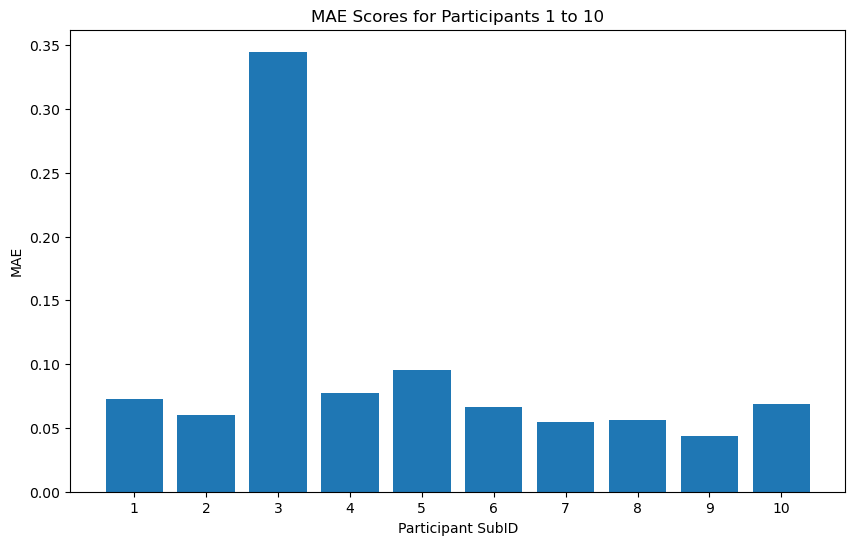

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

errors = []
for sub_id in range(1, 11):
    participant_data = df[df['SubID'] == sub_id]
    actual_values = participant_data['accurate_rating']
    ratings = participant_data['sliderResponsesArrayEXP'] / 100
    ae = abs(ratings - actual_values)
    mae = ae.mean()
    errors.append({
        'SubID': sub_id,
        'MAE': mae
    })
errors_df = pd.DataFrame(errors)

plt.figure(figsize=(10, 6))
plt.bar(errors_df['SubID'], errors_df['MAE'])
plt.xlabel('Participant SubID')
plt.ylabel('MAE')
plt.title('MAE Scores for Participants 1 to 10')
plt.xticks(errors_df['SubID'])
plt.show()


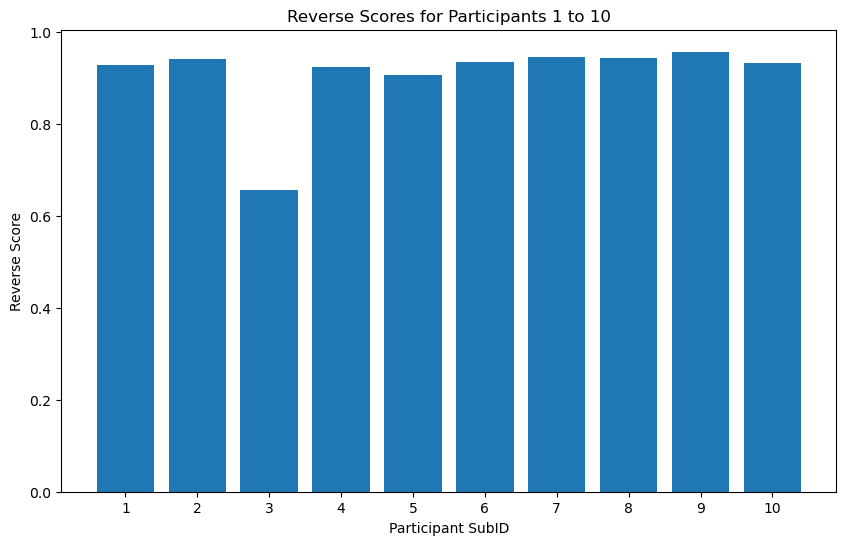

In [71]:
import pandas as pd
import matplotlib.pyplot as plt


errors = []
for sub_id in range(1, 11):
    participant_data = df[df['SubID'] == sub_id]
    actual_values = participant_data['accurate_rating']
    ratings = participant_data['sliderResponsesArrayEXP'] / 100
    ae = abs(ratings - actual_values)
    mae = ae.mean()
    reverse_score = 1 - mae
    
    errors.append({
        'SubID': sub_id,
        'Reverse_Score': reverse_score
    })

results_df = pd.DataFrame(errors)

plt.figure(figsize=(10, 6))
plt.bar(results_df['SubID'], results_df['Reverse_Score'])
plt.xlabel('Participant SubID')
plt.ylabel('Reverse Score')
plt.title('Reverse Scores for Participants 1 to 10')
plt.xticks(results_df['SubID'])
plt.show()


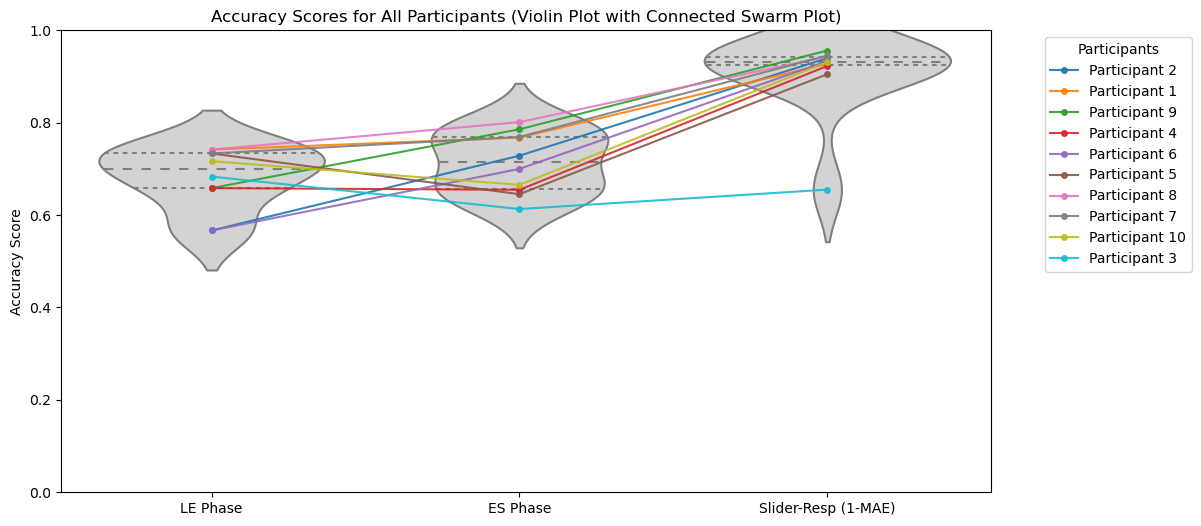

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')
df2 = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')


sub_id_accuracy_score1 = []
sub_id_accuracy_score2 = []
sub_id_accuracy_score3 = []
participant_ids = []

for sub_id in range(1, 11):
    filtered_data = df1[(df1['SubID'] == sub_id) & (df1['Part'] == 1)].copy()
    
    if len(filtered_data) == 120:
        filtered_data.loc[:, 'newOutcomeArray'] = filtered_data['outcomeArrayEXP'].replace(-1, 0)
        total_score = filtered_data['newOutcomeArray'].sum()        
        accuracy_score = (total_score / len(filtered_data['outcomeArrayEXP']))
        sub_id_accuracy_score1.append(accuracy_score)
        participant_ids.append(sub_id)
    
for sub_id in range(1, 11):
    filtered_data = df2[df2['SubID'] == sub_id].copy()
    filtered_data.loc[:, 'newOutcomeArray'] = filtered_data['utility_ArrayEXP2'].replace(-1, 0)        
    total_score = filtered_data['newOutcomeArray'].sum()    
    accuracy_score = (total_score / len(filtered_data['newOutcomeArray']))
    sub_id_accuracy_score2.append(accuracy_score)

for sub_id in range(1, 11):
    participant_data = df[df['SubID'] == sub_id]
    actual_values = participant_data['accurate_rating']
    ratings = participant_data['sliderResponsesArrayEXP'] / 100
    ae = abs(ratings - actual_values)
    mae = ae.mean()
    reverse_score = 1 - mae
    sub_id_accuracy_score3.append(reverse_score)
    
    
    
combined_accuracy_scores = [sub_id_accuracy_score1, sub_id_accuracy_score2, sub_id_accuracy_score3]

# Function from the data guy from MEDIUM 
def connect_data_points(x, y, hue, palette):
    unique_hues = list(set(hue))
    for unique_hue in unique_hues:
        x_values = [x[i] for i in range(len(x)) if hue[i] == unique_hue]
        y_values = [y[i] for i in range(len(y)) if hue[i] == unique_hue]
        plt.plot(x_values, y_values, marker='o', linestyle='-', markersize=4, label=unique_hue, alpha=0.9)

plt.figure(figsize=(12, 6))

sns.violinplot(x=["LE Phase"] * 10 + ["ES Phase"] * 10 + ["Slider-Resp (1-MAE)"] * 10, y=combined_accuracy_scores[0] + combined_accuracy_scores[1] + combined_accuracy_scores[2], 
               inner="quartiles", color="lightgray")

connect_data_points(["LE Phase"] * 10 + ["ES Phase"] * 10 + ["Slider-Resp"] * 10, 
                    combined_accuracy_scores[0] + combined_accuracy_scores[1] + combined_accuracy_scores[2], 
                    hue=["Participant " + str(i) for i in participant_ids] * 3, 
                    palette=sns.color_palette("Set1", len(participant_ids)))

plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for All Participants (Violin Plot with Connected Swarm Plot)')
plt.ylim(0, 1)  
plt.legend(title="Participants", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Comparison of slider response accuracy for pie chart categories and experiential images 
    - are people more accurate at guessing the proability of winning for pie images than experiential images?? ##

In [14]:
import pandas as pd
import numpy as np

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')
experiential_images = ["'Fire'", "'Intersection'", "'Magnet'", "'Mark'", "'Cycle'", "'Menue'"]
results = {}

for sub_id in range(1, 11):
    sub_df = df[(df['SubID'] == sub_id) & (df['selectedImageNamesArrayEXP'].isin(experiential_images))]
    
    ratings = sub_df['sliderResponsesArrayEXP'] / 100
    actual_values = sub_df['accurate_rating']
    ae = abs(ratings - actual_values)
    
    mae = ae.mean()
    mse = (ae ** 2).mean()
    rmse = np.sqrt(mse)
    
    results[f"Participant {sub_id}"] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    }

for participant, metrics in results.items():
    print(participant)
    print(f"MAE: {metrics['MAE']:.4f}")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"RMSE: {metrics['RMSE']:.4f}")
    print()

results = pd.DataFrame(results)
print(results)



Participant 1
MAE: 0.1377
MSE: 0.0243
RMSE: 0.1558

Participant 2
MAE: 0.1193
MSE: 0.0220
RMSE: 0.1484

Participant 3
MAE: 0.3337
MSE: 0.1436
RMSE: 0.3790

Participant 4
MAE: 0.1470
MSE: 0.0362
RMSE: 0.1902

Participant 5
MAE: 0.2610
MSE: 0.0779
RMSE: 0.2792

Participant 6
MAE: 0.1347
MSE: 0.0430
RMSE: 0.2073

Participant 7
MAE: 0.1070
MSE: 0.0174
RMSE: 0.1317

Participant 8
MAE: 0.0611
MSE: 0.0114
RMSE: 0.1069

Participant 9
MAE: 0.1130
MSE: 0.0172
RMSE: 0.1312

Participant 10
MAE: 0.1117
MSE: 0.0293
RMSE: 0.1711

      Participant 1  Participant 2  Participant 3  Participant 4  \
MAE        0.137667       0.119333       0.333667       0.147000   
MSE        0.024268       0.022020       0.143622       0.036182   
RMSE       0.155783       0.148391       0.378974       0.190215   

      Participant 5  Participant 6  Participant 7  Participant 8  \
MAE        0.261000       0.134667       0.107000       0.061071   
MSE        0.077935       0.042967       0.017355       0.011438   
RM

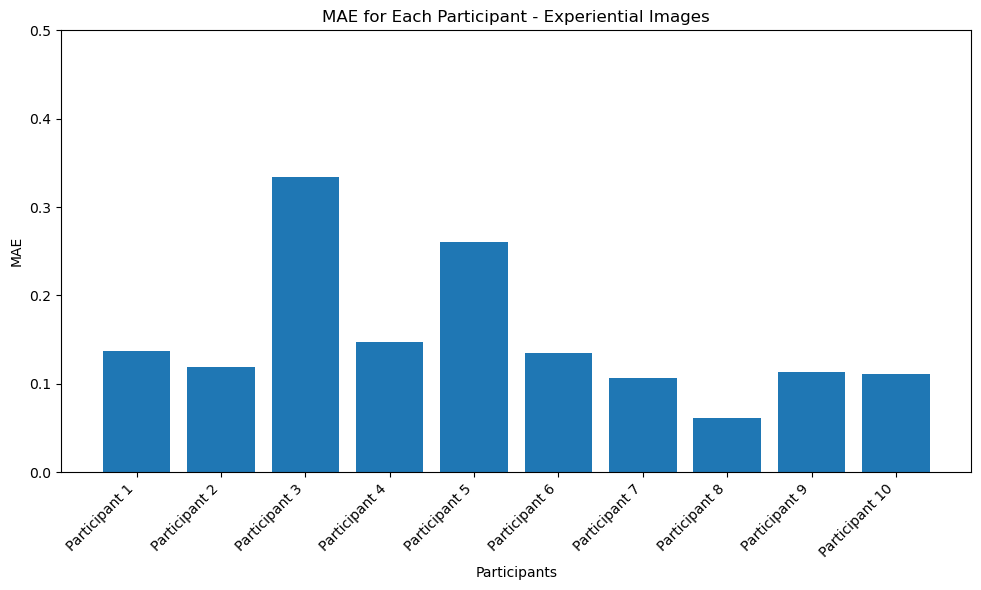

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

experiential_images = ["'Fire'", "'Intersection'", "'Magnet'", "'Mark'", "'Cycle'", "'Menue'"]

results = {}

for sub_id in range(1, 11):
    sub_df = df[(df['SubID'] == sub_id) & (df['selectedImageNamesArrayEXP'].isin(experiential_images))]
    
    ratings = sub_df['sliderResponsesArrayEXP'] / 100
    actual_values = sub_df['accurate_rating']
    ae = abs(ratings - actual_values)
    mae = ae.mean()
    mse = (ae ** 2).mean()
    rmse = np.sqrt(mse)
    
    results[f"Participant {sub_id}"] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    }

results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
plt.bar(results_df.columns, results_df.loc["MAE"])
plt.xlabel("Participants")
plt.ylabel("MAE")
plt.title("MAE for Each Participant - Experiential Images")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.ylim(0,0.5)
plt.show()


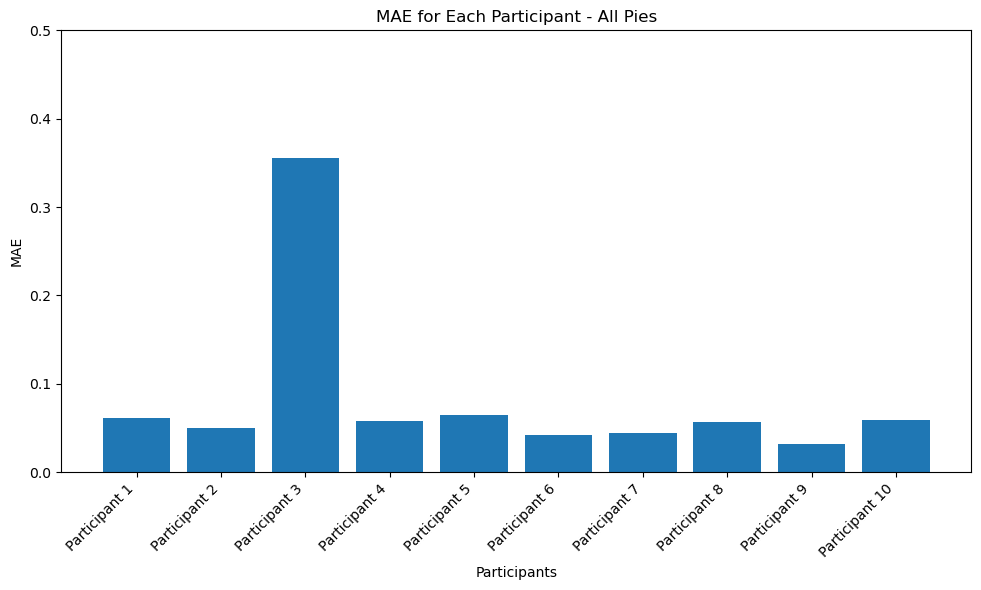

Participant 1
MAE: 0.0610
MSE: 0.0162
RMSE: 0.1275

Participant 2
MAE: 0.0505
MSE: 0.0045
RMSE: 0.0673

Participant 3
MAE: 0.3560
MSE: 0.2093
RMSE: 0.4575

Participant 4
MAE: 0.0581
MSE: 0.0063
RMSE: 0.0794

Participant 5
MAE: 0.0648
MSE: 0.0069
RMSE: 0.0830

Participant 6
MAE: 0.0419
MSE: 0.0159
RMSE: 0.1260

Participant 7
MAE: 0.0439
MSE: 0.0033
RMSE: 0.0577

Participant 8
MAE: 0.0563
MSE: 0.0092
RMSE: 0.0957

Participant 9
MAE: 0.0314
MSE: 0.0031
RMSE: 0.0561

Participant 10
MAE: 0.0593
MSE: 0.0111
RMSE: 0.1053

      Participant 1  Participant 2  Participant 3  Participant 4  \
MAE        0.060952       0.050476       0.355952       0.058095   
MSE        0.016250       0.004530       0.209338       0.006310   
RMSE       0.127475       0.067304       0.457535       0.079433   

      Participant 5  Participant 6  Participant 7  Participant 8  \
MAE        0.064762       0.041905       0.043929       0.056310   
MSE        0.006892       0.015864       0.003330       0.009162   
RM

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

pie_categories = [
"'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'",
"'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'",
"'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'",
"'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"
]

results = {}

for sub_id in range(1, 11):
    sub_df = df[(df['SubID'] == sub_id) & (df['selectedImageNamesArrayEXP'].isin(pie_categories))]
    
    ratings = sub_df['sliderResponsesArrayEXP'] / 100
    actual_values = sub_df['accurate_rating']
    ae = abs(ratings - actual_values)
    
    mae = ae.mean()
    mse = (ae ** 2).mean()
    rmse = np.sqrt(mse)
    
    results[f"Participant {sub_id}"] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    }

results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
plt.bar(results_df.columns, results_df.loc["MAE"])
plt.xlabel("Participants")
plt.ylabel("MAE")
plt.title("MAE for Each Participant - All Pies")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.ylim(0,0.5)
plt.show()

for participant, metrics in results.items():
    print(participant)
    print(f"MAE: {metrics['MAE']:.4f}")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"RMSE: {metrics['RMSE']:.4f}")
    print()

results = pd.DataFrame(results)
print(results)


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

accurate_ratings = []

pie_categories = [
    ["'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"],
    ["'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'"],
    ["'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'"],
    ["'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]
]

pie_categories_transposed = np.array(pie_categories).T.tolist()

cat_1, cat_2, cat_3, cat_4, cat_5, cat_6, cat_7 = pie_categories_transposed

for index, row in df.iterrows():
    selected_image = row['selectedImageNamesArrayEXP']
    if selected_image in cat_1:
        probability = 0.125
    elif selected_image in cat_2:
        probability = 0.25
    elif selected_image in cat_3:
        probability = 0.375
    elif selected_image in cat_4:
        probability = 0.5
    elif selected_image in cat_5:
        probability = 0.625
    elif selected_image in cat_6:
        probability = 0.75
    elif selected_image in cat_7:
        probability = 0.875
    else:
        probability = None
    
    accurate_ratings.append(probability)

df['accurate_rating'] = accurate_ratings
df.to_csv('Updated_Participant_1_10_Data.csv', sep=';', index=False)


## Pie category 1 == 1/8 ##

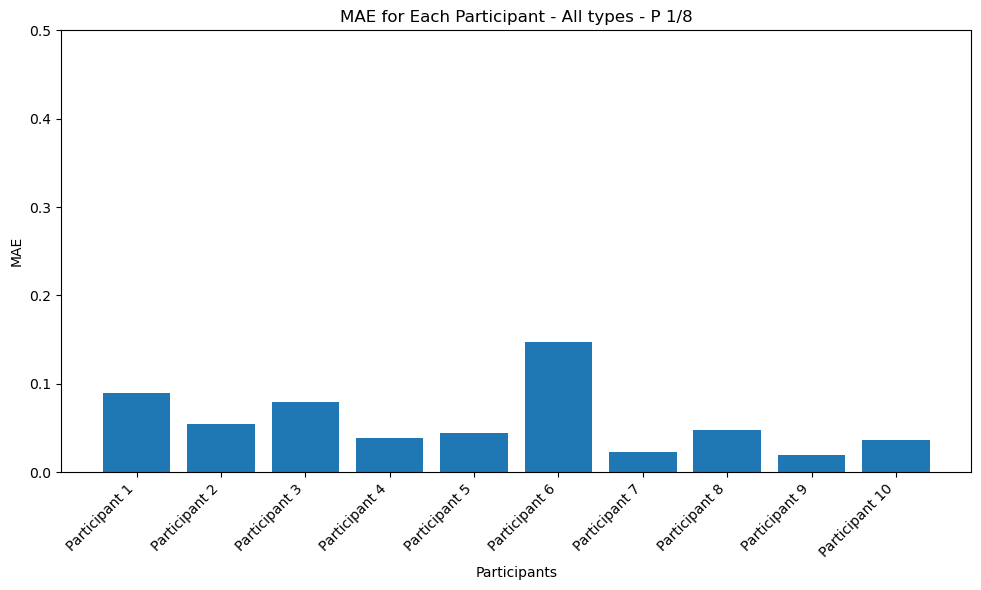

Participant 1
MAE: 0.0892
MSE: 0.0475
RMSE: 0.2180

Participant 2
MAE: 0.0542
MSE: 0.0035
RMSE: 0.0588

Participant 3
MAE: 0.0800
MSE: 0.0071
RMSE: 0.0845

Participant 4
MAE: 0.0383
MSE: 0.0018
RMSE: 0.0427

Participant 5
MAE: 0.0442
MSE: 0.0024
RMSE: 0.0489

Participant 6
MAE: 0.1475
MSE: 0.0959
RMSE: 0.3097

Participant 7
MAE: 0.0233
MSE: 0.0010
RMSE: 0.0323

Participant 8
MAE: 0.0475
MSE: 0.0032
RMSE: 0.0562

Participant 9
MAE: 0.0192
MSE: 0.0005
RMSE: 0.0225

Participant 10
MAE: 0.0367
MSE: 0.0024
RMSE: 0.0487

      Participant 1  Participant 2  Participant 3  Participant 4  \
MAE        0.089167       0.054167       0.080000       0.038333   
MSE        0.047508       0.003458       0.007142       0.001825   
RMSE       0.217964       0.058808       0.084508       0.042720   

      Participant 5  Participant 6  Participant 7  Participant 8  \
MAE        0.044167       0.147500       0.023333       0.047500   
MSE        0.002392       0.095908       0.001042       0.003158   
RM

In [23]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

pie_categories = [
    ["'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"],
    ["'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'"],
    ["'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'"],
    ["'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]
]

pie_categories_transposed = np.array(pie_categories).T.tolist()

cat_1, cat_2, cat_3, cat_4, cat_5, cat_6, cat_7 = pie_categories_transposed

results = {}

for sub_id in range(1, 11):
    sub_df = df[(df['SubID'] == sub_id) & (df['selectedImageNamesArrayEXP'].isin(cat_1))]
    
    ratings = sub_df['sliderResponsesArrayEXP'] / 100
    actual_values = sub_df['accurate_rating']
    ae = abs(ratings - actual_values)
    
    mae = ae.mean()
    mse = (ae ** 2).mean()
    rmse = np.sqrt(mse)
    
    results[f"Participant {sub_id}"] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    }

results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
plt.bar(results_df.columns, results_df.loc["MAE"])
plt.xlabel("Participants")
plt.ylabel("MAE")
plt.title("MAE for Each Participant - All types - P 1/8")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.ylim(0,0.5)
plt.show()

for participant, metrics in results.items():
    print(participant)
    print(f"MAE: {metrics['MAE']:.4f}")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"RMSE: {metrics['RMSE']:.4f}")
    print()

results = pd.DataFrame(results)
print(results)


## Pie category 2 == 2/8 ##

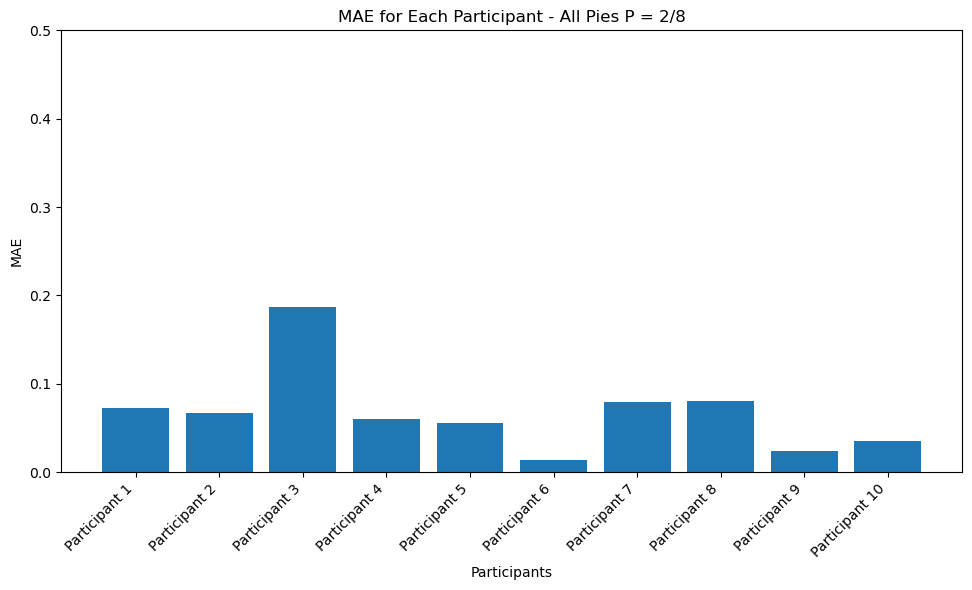

Participant 1
MAE: 0.0725
MSE: 0.0141
RMSE: 0.1189

Participant 2
MAE: 0.0667
MSE: 0.0077
RMSE: 0.0878

Participant 3
MAE: 0.1875
MSE: 0.0412
RMSE: 0.2031

Participant 4
MAE: 0.0600
MSE: 0.0057
RMSE: 0.0756

Participant 5
MAE: 0.0558
MSE: 0.0044
RMSE: 0.0660

Participant 6
MAE: 0.0142
MSE: 0.0011
RMSE: 0.0325

Participant 7
MAE: 0.0792
MSE: 0.0084
RMSE: 0.0915

Participant 8
MAE: 0.0808
MSE: 0.0247
RMSE: 0.1572

Participant 9
MAE: 0.0242
MSE: 0.0015
RMSE: 0.0386

Participant 10
MAE: 0.0358
MSE: 0.0033
RMSE: 0.0572

      Participant 1  Participant 2  Participant 3  Participant 4  \
MAE        0.072500       0.066667       0.187500       0.060000   
MSE        0.014142       0.007717       0.041242       0.005717   
RMSE       0.118919       0.087845       0.203080       0.075609   

      Participant 5  Participant 6  Participant 7  Participant 8  \
MAE        0.055833       0.014167       0.079167       0.080833   
MSE        0.004358       0.001058       0.008375       0.024708   
RM

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

pie_categories = [
    ["'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"],
    ["'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'"],
    ["'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'"],
    ["'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]
]

pie_categories_transposed = np.array(pie_categories).T.tolist()

cat_1, cat_2, cat_3, cat_4, cat_5, cat_6, cat_7 = pie_categories_transposed
results = {}

for sub_id in range(1, 11):
    sub_df = df[(df['SubID'] == sub_id) & (df['selectedImageNamesArrayEXP'].isin(cat_2))]
    
    ratings = sub_df['sliderResponsesArrayEXP'] / 100
    actual_values = sub_df['accurate_rating']
    ae = abs(ratings - actual_values)
    
    mae = ae.mean()
    mse = (ae ** 2).mean()
    rmse = np.sqrt(mse)
    
    results[f"Participant {sub_id}"] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    }

results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
plt.bar(results_df.columns, results_df.loc["MAE"])
plt.xlabel("Participants")
plt.ylabel("MAE")
plt.title("MAE for Each Participant - All Pies P = 2/8")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.ylim(0,0.5)
plt.show()

for participant, metrics in results.items():
    print(participant)
    print(f"MAE: {metrics['MAE']:.4f}")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"RMSE: {metrics['RMSE']:.4f}")
    print()

results = pd.DataFrame(results)
print(results)


## Pie category 3 == 3/8 ##

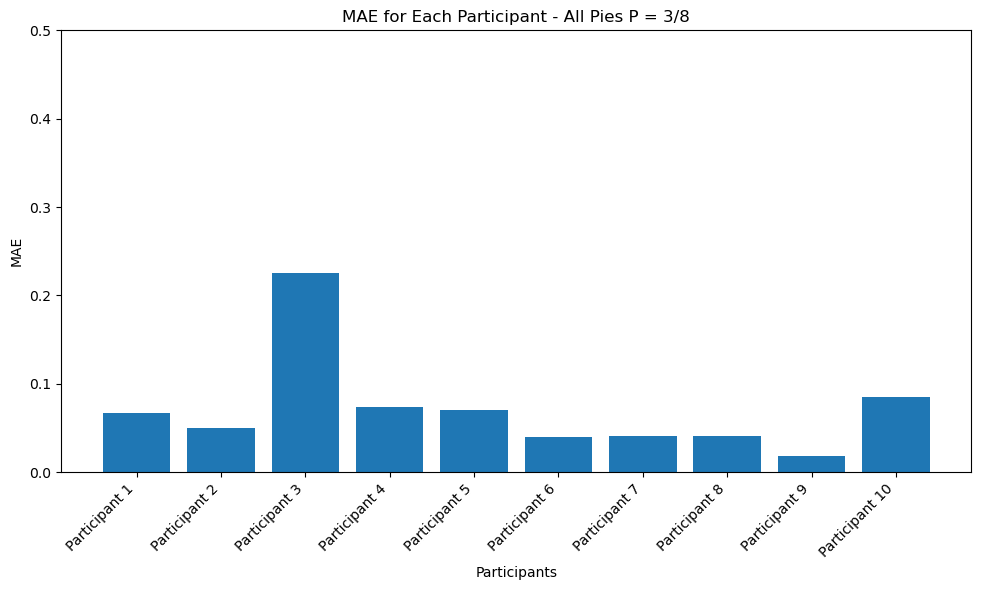

Participant 1
MAE: 0.0675
MSE: 0.0091
RMSE: 0.0954

Participant 2
MAE: 0.0500
MSE: 0.0035
RMSE: 0.0591

Participant 3
MAE: 0.2258
MSE: 0.0670
RMSE: 0.2589

Participant 4
MAE: 0.0742
MSE: 0.0067
RMSE: 0.0821

Participant 5
MAE: 0.0708
MSE: 0.0067
RMSE: 0.0819

Participant 6
MAE: 0.0400
MSE: 0.0059
RMSE: 0.0771

Participant 7
MAE: 0.0408
MSE: 0.0023
RMSE: 0.0479

Participant 8
MAE: 0.0408
MSE: 0.0043
RMSE: 0.0654

Participant 9
MAE: 0.0183
MSE: 0.0010
RMSE: 0.0315

Participant 10
MAE: 0.0850
MSE: 0.0105
RMSE: 0.1023

      Participant 1  Participant 2  Participant 3  Participant 4  \
MAE        0.067500       0.050000       0.225833       0.074167   
MSE        0.009108       0.003492       0.067008       0.006742   
RMSE       0.095438       0.059090       0.258860       0.082108   

      Participant 5  Participant 6  Participant 7  Participant 8  \
MAE        0.070833       0.040000       0.040833       0.040833   
MSE        0.006708       0.005942       0.002292       0.004275   
RM

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

pie_categories = [
    ["'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"],
    ["'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'"],
    ["'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'"],
    ["'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]
]

pie_categories_transposed = np.array(pie_categories).T.tolist()

cat_1, cat_2, cat_3, cat_4, cat_5, cat_6, cat_7 = pie_categories_transposed

results = {}

for sub_id in range(1, 11):
    sub_df = df[(df['SubID'] == sub_id) & (df['selectedImageNamesArrayEXP'].isin(cat_3))]
    
    ratings = sub_df['sliderResponsesArrayEXP'] / 100
    actual_values = sub_df['accurate_rating']
    ae = abs(ratings - actual_values)
    
    mae = ae.mean()
    mse = (ae ** 2).mean()
    rmse = np.sqrt(mse)
    
    results[f"Participant {sub_id}"] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    }

results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
plt.bar(results_df.columns, results_df.loc["MAE"])
plt.xlabel("Participants")
plt.ylabel("MAE")
plt.title("MAE for Each Participant - All Pies P = 3/8")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.ylim(0,0.5)
plt.show()

for participant, metrics in results.items():
    print(participant)
    print(f"MAE: {metrics['MAE']:.4f}")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"RMSE: {metrics['RMSE']:.4f}")
    print()

results = pd.DataFrame(results)
print(results)


## Pie category 4 == 4/8 ##

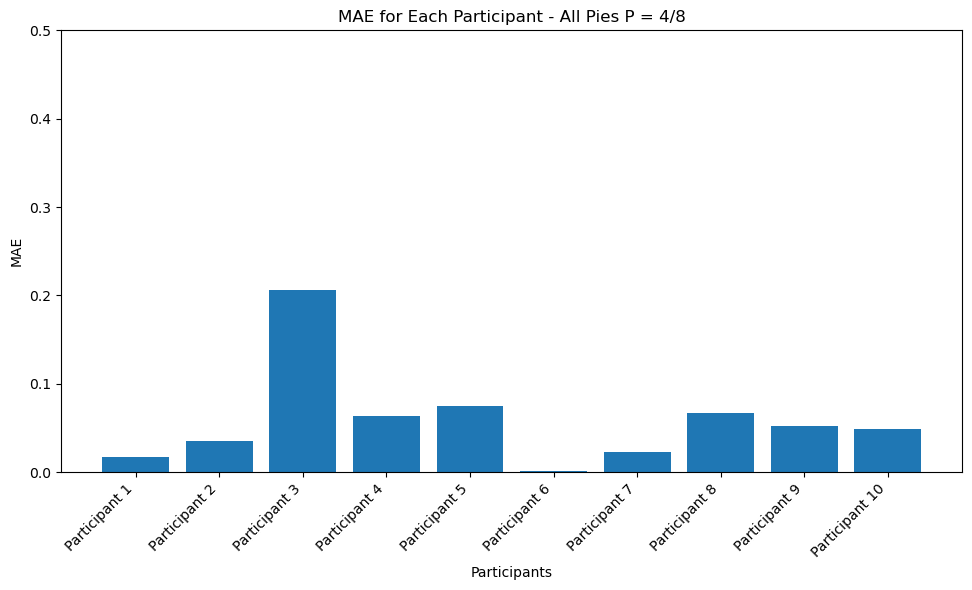

Participant 1
MAE: 0.0175
MSE: 0.0008
RMSE: 0.0281

Participant 2
MAE: 0.0358
MSE: 0.0038
RMSE: 0.0616

Participant 3
MAE: 0.2058
MSE: 0.0551
RMSE: 0.2347

Participant 4
MAE: 0.0633
MSE: 0.0118
RMSE: 0.1087

Participant 5
MAE: 0.0750
MSE: 0.0123
RMSE: 0.1108

Participant 6
MAE: 0.0017
MSE: 0.0000
RMSE: 0.0041

Participant 7
MAE: 0.0225
MSE: 0.0008
RMSE: 0.0278

Participant 8
MAE: 0.0675
MSE: 0.0191
RMSE: 0.1381

Participant 9
MAE: 0.0525
MSE: 0.0063
RMSE: 0.0792

Participant 10
MAE: 0.0492
MSE: 0.0048
RMSE: 0.0690

      Participant 1  Participant 2  Participant 3  Participant 4  \
MAE        0.017500       0.035833       0.205833       0.063333   
MSE        0.000792       0.003792       0.055075       0.011817   
RMSE       0.028137       0.061577       0.234681       0.108704   

      Participant 5  Participant 6  Participant 7  Participant 8  \
MAE        0.075000       0.001667       0.022500       0.067500   
MSE        0.012283       0.000017       0.000775       0.019058   
RM

In [6]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

pie_categories = [
    ["'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"],
    ["'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'"],
    ["'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'"],
    ["'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]
]

pie_categories_transposed = np.array(pie_categories).T.tolist()

cat_1, cat_2, cat_3, cat_4, cat_5, cat_6, cat_7 = pie_categories_transposed

results = {}

for sub_id in range(1, 11):
    sub_df = df[(df['SubID'] == sub_id) & (df['selectedImageNamesArrayEXP'].isin(cat_4))]
    
    ratings = sub_df['sliderResponsesArrayEXP'] / 100
    actual_values = sub_df['accurate_rating']
    ae = abs(ratings - actual_values)
    
    mae = ae.mean()
    mse = (ae ** 2).mean()
    rmse = np.sqrt(mse)
    
    results[f"Participant {sub_id}"] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    }

results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
plt.bar(results_df.columns, results_df.loc["MAE"])
plt.xlabel("Participants")
plt.ylabel("MAE")
plt.title("MAE for Each Participant - All Pies P = 4/8")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.ylim(0,0.5)
plt.show()

for participant, metrics in results.items():
    print(participant)
    print(f"MAE: {metrics['MAE']:.4f}")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"RMSE: {metrics['RMSE']:.4f}")
    print()

results = pd.DataFrame(results)
print(results)


## Pie category 5 == 5/8 ##

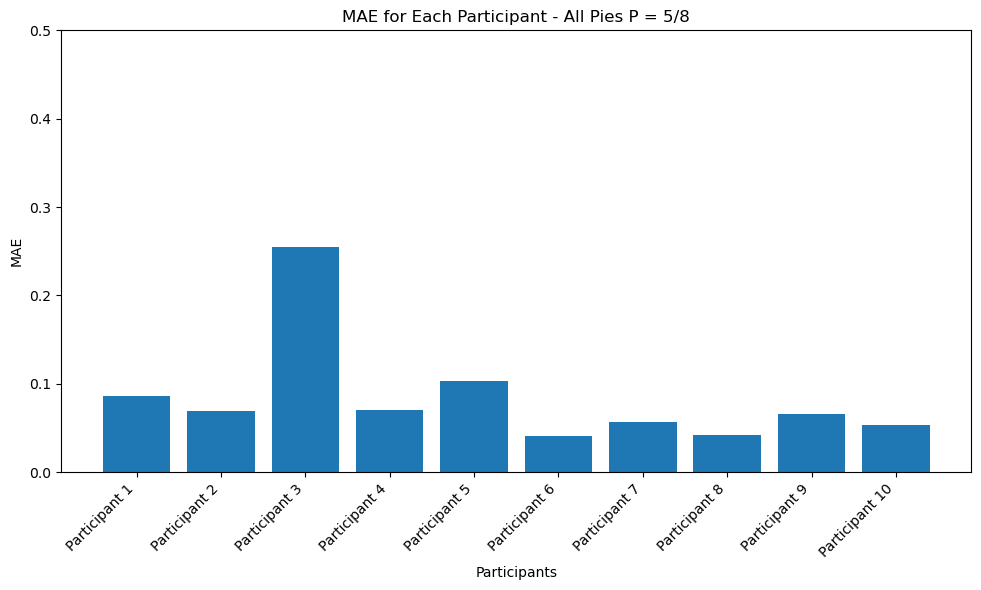

Participant 1
MAE: 0.0867
MSE: 0.0241
RMSE: 0.1553

Participant 2
MAE: 0.0692
MSE: 0.0083
RMSE: 0.0910

Participant 3
MAE: 0.2550
MSE: 0.1033
RMSE: 0.3214

Participant 4
MAE: 0.0708
MSE: 0.0081
RMSE: 0.0899

Participant 5
MAE: 0.1033
MSE: 0.0144
RMSE: 0.1200

Participant 6
MAE: 0.0408
MSE: 0.0044
RMSE: 0.0664

Participant 7
MAE: 0.0567
MSE: 0.0049
RMSE: 0.0699

Participant 8
MAE: 0.0425
MSE: 0.0024
RMSE: 0.0486

Participant 9
MAE: 0.0658
MSE: 0.0106
RMSE: 0.1029

Participant 10
MAE: 0.0533
MSE: 0.0039
RMSE: 0.0624

      Participant 1  Participant 2  Participant 3  Participant 4  \
MAE        0.086667       0.069167       0.255000       0.070833   
MSE        0.024108       0.008275       0.103308       0.008075   
RMSE       0.155269       0.090967       0.321416       0.089861   

      Participant 5  Participant 6  Participant 7  Participant 8  \
MAE        0.103333       0.040833       0.056667       0.042500   
MSE        0.014392       0.004408       0.004892       0.002358   
RM

In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

pie_categories = [
    ["'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"],
    ["'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'"],
    ["'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'"],
    ["'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]
]

pie_categories_transposed = np.array(pie_categories).T.tolist()

cat_1, cat_2, cat_3, cat_4, cat_5, cat_6, cat_7 = pie_categories_transposed

results = {}

for sub_id in range(1, 11):
    sub_df = df[(df['SubID'] == sub_id) & (df['selectedImageNamesArrayEXP'].isin(cat_5))]
    
    ratings = sub_df['sliderResponsesArrayEXP'] / 100
    actual_values = sub_df['accurate_rating']
    ae = abs(ratings - actual_values)
    
    mae = ae.mean()
    mse = (ae ** 2).mean()
    rmse = np.sqrt(mse)
    
    results[f"Participant {sub_id}"] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    }

results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
plt.bar(results_df.columns, results_df.loc["MAE"])
plt.xlabel("Participants")
plt.ylabel("MAE")
plt.title("MAE for Each Participant - All Pies P = 5/8")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.ylim(0,0.5)
plt.show()

for participant, metrics in results.items():
    print(participant)
    print(f"MAE: {metrics['MAE']:.4f}")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"RMSE: {metrics['RMSE']:.4f}")
    print()

results = pd.DataFrame(results)
print(results)


## Pie category 6 == 6/8 ##

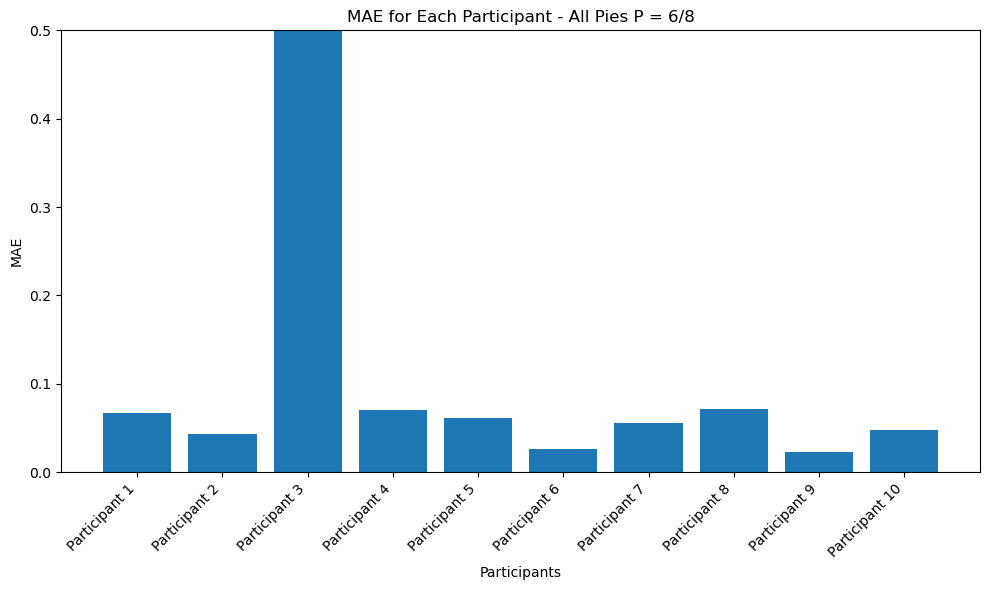

Participant 1
MAE: 0.0667
MSE: 0.0169
RMSE: 0.1301

Participant 2
MAE: 0.0433
MSE: 0.0035
RMSE: 0.0592

Participant 3
MAE: 0.7050
MSE: 0.4972
RMSE: 0.7052

Participant 4
MAE: 0.0700
MSE: 0.0087
RMSE: 0.0932

Participant 5
MAE: 0.0617
MSE: 0.0057
RMSE: 0.0758

Participant 6
MAE: 0.0258
MSE: 0.0022
RMSE: 0.0465

Participant 7
MAE: 0.0558
MSE: 0.0048
RMSE: 0.0690

Participant 8
MAE: 0.0717
MSE: 0.0078
RMSE: 0.0886

Participant 9
MAE: 0.0233
MSE: 0.0017
RMSE: 0.0414

Participant 10
MAE: 0.0483
MSE: 0.0035
RMSE: 0.0596

      Participant 1  Participant 2  Participant 3  Participant 4  \
MAE        0.066667       0.043333        0.70500       0.070000   
MSE        0.016917       0.003500        0.49725       0.008683   
RMSE       0.130064       0.059161        0.70516       0.093184   

      Participant 5  Participant 6  Participant 7  Participant 8  \
MAE        0.061667       0.025833       0.055833       0.071667   
MSE        0.005750       0.002158       0.004758       0.007850   
RM

In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

pie_categories = [
    ["'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"],
    ["'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'"],
    ["'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'"],
    ["'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]
]

pie_categories_transposed = np.array(pie_categories).T.tolist()

cat_1, cat_2, cat_3, cat_4, cat_5, cat_6, cat_7 = pie_categories_transposed

results = {}

for sub_id in range(1, 11):
    sub_df = df[(df['SubID'] == sub_id) & (df['selectedImageNamesArrayEXP'].isin(cat_6))]
    
    ratings = sub_df['sliderResponsesArrayEXP'] / 100
    actual_values = sub_df['accurate_rating']
    ae = abs(ratings - actual_values)
    
    mae = ae.mean()
    mse = (ae ** 2).mean()
    rmse = np.sqrt(mse)
    
    results[f"Participant {sub_id}"] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    }

results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
plt.bar(results_df.columns, results_df.loc["MAE"])
plt.xlabel("Participants")
plt.ylabel("MAE")
plt.title("MAE for Each Participant - All Pies P = 6/8")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.ylim(0,0.5)
plt.show()

for participant, metrics in results.items():
    print(participant)
    print(f"MAE: {metrics['MAE']:.4f}")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"RMSE: {metrics['RMSE']:.4f}")
    print()

results = pd.DataFrame(results)
print(results)


## Pie category 7 == 7/8 ##

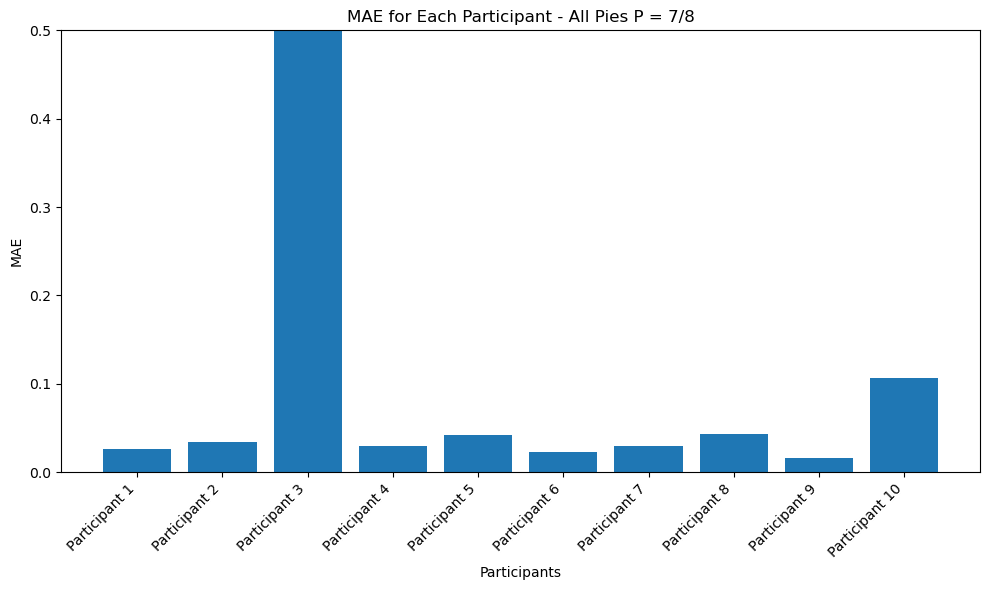

Participant 1
MAE: 0.0267
MSE: 0.0012
RMSE: 0.0343

Participant 2
MAE: 0.0342
MSE: 0.0015
RMSE: 0.0384

Participant 3
MAE: 0.8325
MSE: 0.6943
RMSE: 0.8333

Participant 4
MAE: 0.0300
MSE: 0.0013
RMSE: 0.0362

Participant 5
MAE: 0.0425
MSE: 0.0024
RMSE: 0.0486

Participant 6
MAE: 0.0233
MSE: 0.0016
RMSE: 0.0395

Participant 7
MAE: 0.0292
MSE: 0.0012
RMSE: 0.0343

Participant 8
MAE: 0.0433
MSE: 0.0027
RMSE: 0.0522

Participant 9
MAE: 0.0167
MSE: 0.0005
RMSE: 0.0214

Participant 10
MAE: 0.1067
MSE: 0.0493
RMSE: 0.2220

      Participant 1  Participant 2  Participant 3  Participant 4  \
MAE        0.026667       0.034167       0.832500       0.030000   
MSE        0.001175       0.001475       0.694342       0.001308   
RMSE       0.034278       0.038406       0.833272       0.036171   

      Participant 5  Participant 6  Participant 7  Participant 8  \
MAE        0.042500       0.023333       0.029167       0.043333   
MSE        0.002358       0.001558       0.001175       0.002725   
RM

In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

pie_categories = [
    ["'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"],
    ["'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'"],
    ["'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'"],
    ["'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]
]

pie_categories_transposed = np.array(pie_categories).T.tolist()

cat_1, cat_2, cat_3, cat_4, cat_5, cat_6, cat_7 = pie_categories_transposed

results = {}

for sub_id in range(1, 11):
    sub_df = df[(df['SubID'] == sub_id) & (df['selectedImageNamesArrayEXP'].isin(cat_7))]
    
    ratings = sub_df['sliderResponsesArrayEXP'] / 100
    actual_values = sub_df['accurate_rating']
    ae = abs(ratings - actual_values)
    
    mae = ae.mean()
    mse = (ae ** 2).mean()
    rmse = np.sqrt(mse)
    
    results[f"Participant {sub_id}"] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    }

results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
plt.bar(results_df.columns, results_df.loc["MAE"])
plt.xlabel("Participants")
plt.ylabel("MAE")
plt.title("MAE for Each Participant - All Pies P = 7/8")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.ylim(0,0.5)
plt.show()

for participant, metrics in results.items():
    print(participant)
    print(f"MAE: {metrics['MAE']:.4f}")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"RMSE: {metrics['RMSE']:.4f}")
    print()

results = pd.DataFrame(results)
print(results)


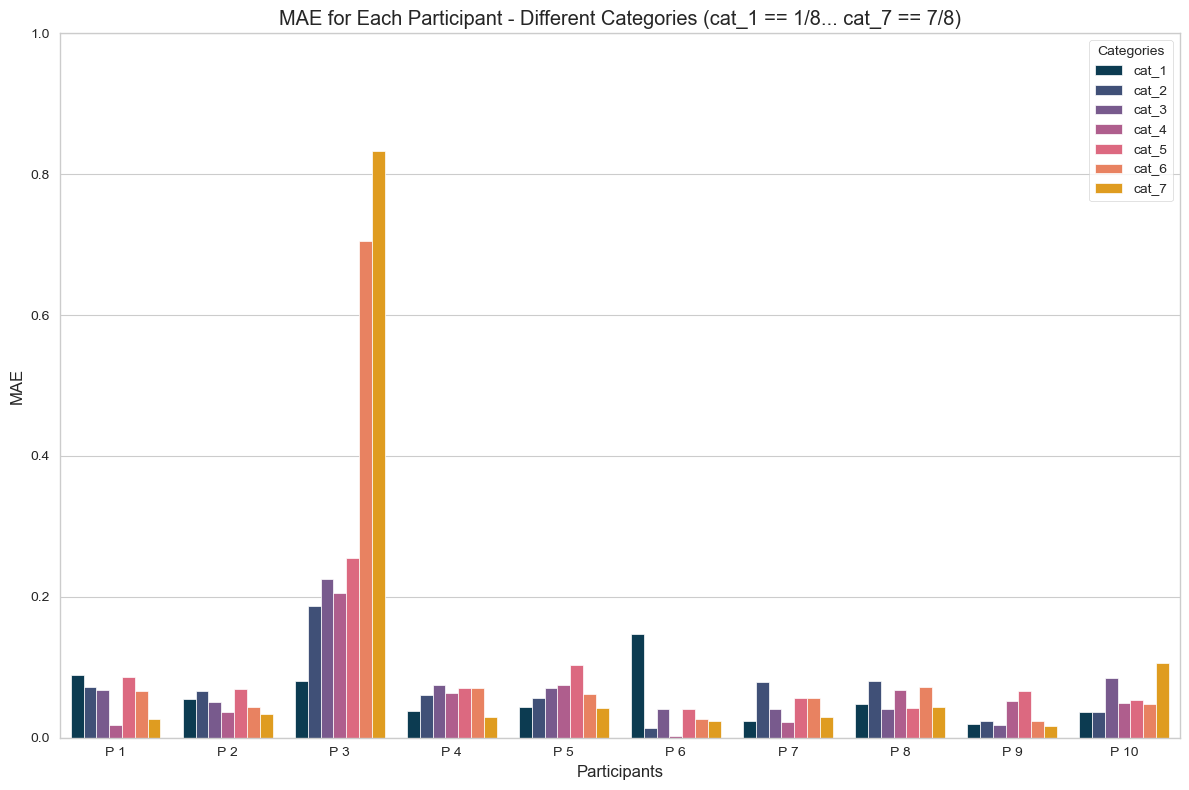

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

pie_categories = [
    ["'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"],
    ["'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'"],
    ["'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'"],
    ["'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]
]

pie_categories_transposed = np.array(pie_categories).T.tolist()

results = []

for sub_id in range(1, 11):
    sub_results = []

    for category_index, category_names in enumerate(pie_categories_transposed):
        category_name = f"cat_{category_index + 1}"

        sub_df = df[(df['SubID'] == sub_id) & (df['selectedImageNamesArrayEXP'].isin(category_names))]

        ratings = sub_df['sliderResponsesArrayEXP'] / 100
        actual_values = sub_df['accurate_rating']
        ae = abs(ratings - actual_values)

        mae = ae.mean()
        mse = (ae ** 2).mean()
        rmse = np.sqrt(mse)

        sub_results.append({
            "Category": category_name,
            "Participant": f"P {sub_id}",
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse
        })

    results.extend(sub_results)

results_df = pd.DataFrame(results)

plt.style.use('ggplot')
sns.set_style("whitegrid")
palette = ["#003f5c","#374c80","#7a5195","#bc5090","#ef5675","#ff764a", "#ffa600"]

# grouped bar plot 
plt.figure(figsize=(12, 8))
sns.barplot(data=results_df, x='Participant', y='MAE', hue='Category', palette= palette)     # palette 'terrain_r'

#003f5c
#374c80
#7a5195
#bc5090
#ef5675
#ff764a
#ffa600

plt.xlabel('Participants')
plt.ylabel('MAE')
plt.title('MAE for Each Participant - Different Categories (cat_1 == 1/8... cat_7 == 7/8)')
plt.xticks(rotation=0)
plt.legend(title='Categories')
plt.tight_layout()
plt.ylim(0, 1)
plt.show()


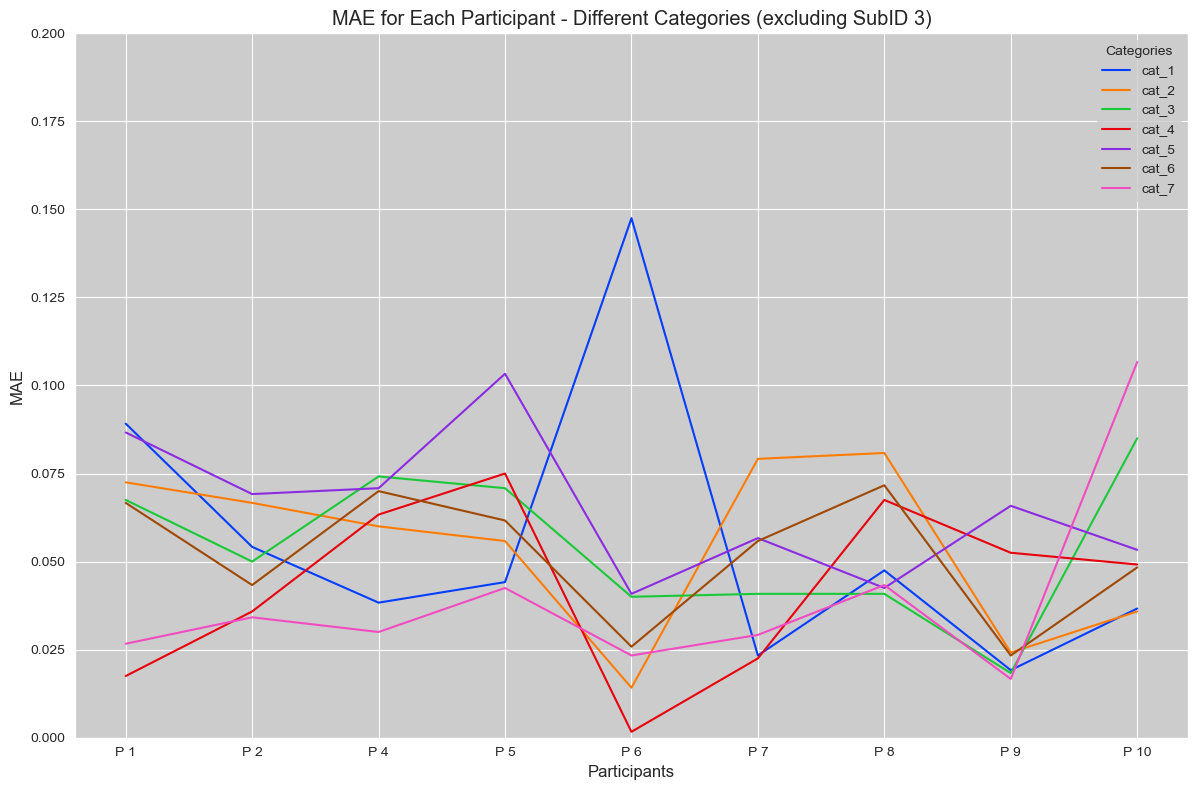

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')
pie_categories = [
    ["'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"],
    ["'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'"],
    ["'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'"],
    ["'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]
]

pie_categories_transposed = np.array(pie_categories).T.tolist()
results = []

for sub_id in range(1, 11):
    if sub_id != 3:  
        sub_results = []

        for category_index, category_names in enumerate(pie_categories_transposed):
            category_name = f"cat_{category_index + 1}"

            sub_df = df[(df['SubID'] == sub_id) & (df['selectedImageNamesArrayEXP'].isin(category_names))]

            ratings = sub_df['sliderResponsesArrayEXP'] / 100
            actual_values = sub_df['accurate_rating']
            ae = abs(ratings - actual_values)

            mae = ae.mean()
            mse = (ae ** 2).mean()
            rmse = np.sqrt(mse)

            sub_results.append({
                "Category": category_name,
                "Participant": f"P {sub_id}",
                "MAE": mae,
                "MSE": mse,
                "RMSE": rmse
            })

        results.extend(sub_results)

results_df = pd.DataFrame(results)

plt.style.use('ggplot')
sns.set_style("darkgrid", {"axes.facecolor": ".8"})  
palette = ["#003f5c","#374c80","#7a5195","#bc5090","#ef5675","#ff764a", "#ffa600"]

plt.figure(figsize=(12, 8))
sns.lineplot(data=results_df, x='Participant', y='MAE', hue='Category', palette= 'bright')  # palette 'terrain_r'

plt.xlabel('Participants')
plt.ylabel('MAE')
plt.title('MAE for Each Participant - Different Categories (excluding SubID 3)')
plt.xticks(rotation=0)
plt.legend(title='Categories')
plt.tight_layout()
plt.ylim(0, 0.2)
plt.show()


In [120]:
# Cohen's d for MAE
cohen_d_mae = {}
categories = results_df_mae['Category'].unique()
for i in range(len(categories)):
    for j in range(i+1, len(categories)):
        cat1 = categories[i]
        cat2 = categories[j]
        group1 = results_df_mae[results_df_mae['Category'] == cat1]['MAE']
        group2 = results_df_mae[results_df_mae['Category'] == cat2]['MAE']
        pooled_std = np.sqrt(((len(group1) - 1) * group1.std() ** 2 + (len(group2) - 1) * group2.std() ** 2) / (len(group1) + len(group2) - 2))
        cohens_d = (group1.mean() - group2.mean()) / pooled_std
        cohen_d_mae[f'{cat1} vs {cat2}'] = cohens_d

# Cohen's d for MSE
cohen_d_mse = {}
for i in range(len(categories)):
    for j in range(i+1, len(categories)):
        cat1 = categories[i]
        cat2 = categories[j]
        group1 = results_df_mse[results_df_mse['Category'] == cat1]['MSE']
        group2 = results_df_mse[results_df_mse['Category'] == cat2]['MSE']
        pooled_std = np.sqrt(((len(group1) - 1) * group1.std() ** 2 + (len(group2) - 1) * group2.std() ** 2) / (len(group1) + len(group2) - 2))
        cohens_d = (group1.mean() - group2.mean()) / pooled_std
        cohen_d_mse[f'{cat1} vs {cat2}'] = cohens_d

# Cohen's d for RMSE
cohen_d_rmse = {}
for i in range(len(categories)):
    for j in range(i+1, len(categories)):
        cat1 = categories[i]
        cat2 = categories[j]
        group1 = results_df_rmse[results_df_rmse['Category'] == cat1]['RMSE']
        group2 = results_df_rmse[results_df_rmse['Category'] == cat2]['RMSE']
        pooled_std = np.sqrt(((len(group1) - 1) * group1.std() ** 2 + (len(group2) - 1) * group2.std() ** 2) / (len(group1) + len(group2) - 2))
        cohens_d = (group1.mean() - group2.mean()) / pooled_std
        cohen_d_rmse[f'{cat1} vs {cat2}'] = cohens_d

# Print Cohen's d values
print("Cohen's d for MAE:")
for key, value in cohen_d_mae.items():
    print(f"{key}: {value:.4f}")

print("\nCohen's d for MSE:")
for key, value in cohen_d_mse.items():
    print(f"{key}: {value:.4f}")

print("\nCohen's d for RMSE:")
for key, value in cohen_d_rmse.items():
    print(f"{key}: {value:.4f}")

# post hoc tests (Tukey HSD) for MAE
posthoc_mae = pairwise_tukeyhsd(results_df_mae['MAE'], results_df_mae['Category'])
posthoc_mse = pairwise_tukeyhsd(results_df_mse['MSE'], results_df_mse['Category'])
posthoc_rmse = pairwise_tukeyhsd(results_df_rmse['RMSE'], results_df_rmse['Category'])

# post hoc test results for MAE
print("\nPost Hoc Test Results for MAE:")
print(posthoc_mae)
print("\nPost Hoc Test Results for MSE:")
print(posthoc_mse)
print("\nPost Hoc Test Results for RMSE:")
print(posthoc_rmse)


Cohen's d for MAE:
cat_1 vs cat_2: -0.2225
cat_1 vs cat_3: -0.2712
cat_1 vs cat_4: -0.0224
cat_1 vs cat_5: -0.5066
cat_1 vs cat_6: -0.3969
cat_1 vs cat_7: -0.3355
cat_2 vs cat_3: -0.0690
cat_2 vs cat_4: 0.1635
cat_2 vs cat_5: -0.2996
cat_2 vs cat_6: -0.3291
cat_2 vs cat_7: -0.2801
cat_3 vs cat_4: 0.2138
cat_3 vs cat_5: -0.2164
cat_3 vs cat_6: -0.3012
cat_3 vs cat_7: -0.2578
cat_4 vs cat_5: -0.4231
cat_4 vs cat_6: -0.3823
cat_4 vs cat_7: -0.3251
cat_5 vs cat_6: -0.2138
cat_5 vs cat_7: -0.1855
cat_6 vs cat_7: -0.0058

Cohen's d for MSE:
cat_1 vs cat_2: 0.2229
cat_1 vs cat_3: 0.1848
cat_1 vs cat_4: 0.2026
cat_1 vs cat_5: -0.0614
cat_1 vs cat_6: -0.3451
cat_1 vs cat_7: -0.3793
cat_2 vs cat_3: -0.0299
cat_2 vs cat_4: -0.0174
cat_2 vs cat_5: -0.3091
cat_2 vs cat_6: -0.3992
cat_2 vs cat_7: -0.4171
cat_3 vs cat_4: 0.0132
cat_3 vs cat_5: -0.2622
cat_3 vs cat_6: -0.3929
cat_3 vs cat_7: -0.4129
cat_4 vs cat_5: -0.2841
cat_4 vs cat_6: -0.3960
cat_4 vs cat_7: -0.4149
cat_5 vs cat_6: -0.3285
cat_5 v

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pingouin as pg  

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

pie_categories = [
    ["'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"],
    ["'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'"],
    ["'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'"],
    ["'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]
]

results = []

for sub_id in range(1, 11):
    sub_results = []

    for category_index, category_names in enumerate(pie_categories):
        category_name = f"cat_{category_index + 1}"

        sub_df = df[(df['SubID'] == sub_id) & (df['selectedImageNamesArrayEXP'].isin(category_names))]
        ratings = sub_df['sliderResponsesArrayEXP'] / 100
        actual_values = sub_df['accurate_rating']
        ae = abs(ratings - actual_values)
        sub_results.append({
            "Category": category_name,
            "Participant": f"P {sub_id}",
            "MAE": ae.mean(),
        })

    results.extend(sub_results)

results_df = pd.DataFrame(results)

# Linear Mixed Model for MAE
lmm_mae = smf.mixedlm("MAE ~ Category", data=results_df, groups=results_df["Participant"]).fit()

print(lmm_mae.summary())

# post hoc tukey for LMM
posthoc = pg.pairwise_ttests(data=results_df, dv="MAE", within="Category", subject="Participant", parametric=False)
print(posthoc)


          Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  MAE    
No. Observations:    40       Method:              REML   
No. Groups:          10       Scale:               0.0003 
Min. group size:     4        Log-Likelihood:      70.6854
Max. group size:     4        Converged:           Yes    
Mean group size:     4.0                                  
----------------------------------------------------------
                  Coef. Std.Err.   z   P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept         0.061    0.031 1.967 0.049  0.000  0.121
Category[T.cat_2] 0.017    0.007 2.317 0.021  0.003  0.031
Category[T.cat_3] 0.028    0.007 3.871 0.000  0.014  0.042
Category[T.cat_4] 0.042    0.007 5.829 0.000  0.028  0.056
Group Var         0.009    0.317                          

   Contrast      A      B  Paired  Parametric  W-val alternative     p-unc  \
0  Category  cat_1  cat_2    True       False  

c:\Users\Asus\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\Asus\anaconda3\lib\site-packages\pingouin\pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pingouin as pg  

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

pie_categories = [
    ["'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"],
    ["'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'"],
    ["'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'"],
    ["'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]
]

results = []

for sub_id in range(1, 11):
    sub_results = []

    for category_index, category_names in enumerate(pie_categories):
        category_name = f"cat_{category_index + 1}"

        sub_df = df[(df['SubID'] == sub_id) & (df['selectedImageNamesArrayEXP'].isin(category_names))]
        ratings = sub_df['sliderResponsesArrayEXP'] / 100
        actual_values = sub_df['accurate_rating']
        ae = abs(ratings - actual_values)
        sub_results.append({
            "Category": category_name,
            "Participant": f"P {sub_id}",
            "MAE": ae.mean(),
        })

    results.extend(sub_results)

results_df = pd.DataFrame(results)

# Linear Mixed Model (LMM) for MAE
lmm_mae = smf.mixedlm("MAE ~ Category", data=results_df, groups=results_df["Participant"]).fit()

print("MAE LMM Summary:")
print(lmm_mae.summary())

posthoc = pg.pairwise_ttests(data=results_df, dv="MAE", within="Category", subject="Participant", parametric=False)

p_values = posthoc['p-unc']
reject_hypothesis = posthoc['p-unc'] < 0.05

print("\nPost Hoc Test Results:")
print(posthoc[['Contrast', 'A', 'B', 'p-unc']])
print("\nP-Values:")
print(p_values)
print("\nReject Null Hypothesis:")
print(reject_hypothesis)

# Cohen's d manually from - https://machinelearningmastery.com/effect-size-measures-in-python/

cohens_d = []

for i, category1 in enumerate(pie_categories):
    for j, category2 in enumerate(pie_categories):
        if i < j:
            data1 = results_df[results_df['Category'] == f'cat_{i + 1}']['MAE']
            data2 = results_df[results_df['Category'] == f'cat_{j + 1}']['MAE']
            pooled_std = np.sqrt(((len(data1) - 1) * data1.std() ** 2 + (len(data2) - 1) * data2.std() ** 2) / (len(data1) + len(data2) - 2))
            cohen_d = abs(data1.mean() - data2.mean()) / pooled_std
            cohens_d.append({
                "Category Pair": f"cat_{i + 1} - cat_{j + 1}",
                "Cohen's d": cohen_d
            })

cohens_d_df = pd.DataFrame(cohens_d)

print("\nCohen's d:")
print(cohens_d_df)


MAE LMM Summary:
          Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  MAE    
No. Observations:    40       Method:              REML   
No. Groups:          10       Scale:               0.0003 
Min. group size:     4        Log-Likelihood:      70.6854
Max. group size:     4        Converged:           Yes    
Mean group size:     4.0                                  
----------------------------------------------------------
                  Coef. Std.Err.   z   P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept         0.061    0.031 1.967 0.049  0.000  0.121
Category[T.cat_2] 0.017    0.007 2.317 0.021  0.003  0.031
Category[T.cat_3] 0.028    0.007 3.871 0.000  0.014  0.042
Category[T.cat_4] 0.042    0.007 5.829 0.000  0.028  0.056
Group Var         0.009    0.317                          


Post Hoc Test Results:
   Contrast      A      B     p-unc
0  Category  cat_1  cat_2  0.019531
1  Category 

c:\Users\Asus\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\Asus\anaconda3\lib\site-packages\pingouin\pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pingouin as pg  


df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

pie_categories = [
    ["'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"],
    ["'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'"],
    ["'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'"],
    ["'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]
]

results = []

for sub_id in range(1, 11):
    sub_results = []

    for category_index, category_names in enumerate(pie_categories):
        category_name = f"cat_{category_index + 1}"

        sub_df = df[(df['SubID'] == sub_id) & (df['selectedImageNamesArrayEXP'].isin(category_names))]
        ratings = sub_df['sliderResponsesArrayEXP'] / 100
        actual_values = sub_df['accurate_rating']
        ae = abs(ratings - actual_values)

        sub_results.append({
            "Category": category_name,
            "Participant": f"P {sub_id}",
            "MAE": ae.mean(),
        })

    results.extend(sub_results)

results_df = pd.DataFrame(results)

lmm_mae = smf.mixedlm("MAE ~ Category", data=results_df, groups=results_df["Participant"]).fit()

print("MAE LMM Summary:")
print(lmm_mae.summary())

posthoc = pg.pairwise_ttests(data=results_df, dv="MAE", within="Category", subject="Participant", parametric=False)

p_values = posthoc['p-unc']
reject_hypothesis = posthoc['p-unc'] < 0.05

print("\nPost Hoc Test Results:")
print(posthoc[['Contrast', 'A', 'B', 'p-unc']].to_string(index=False))
print("\nP-Values:")
print(p_values.to_string(index=False))
print("\nReject Null Hypothesis:")
print(reject_hypothesis.to_string(index=False))

cohens_d = []             # Cohen's d manually from - https://machinelearningmastery.com/effect-size-measures-in-python/


for i, category1 in enumerate(pie_categories):
    for j, category2 in enumerate(pie_categories):
        if i < j:
            data1 = results_df[results_df['Category'] == f'cat_{i + 1}']['MAE']
            data2 = results_df[results_df['Category'] == f'cat_{j + 1}']['MAE']
            pooled_std = np.sqrt(((len(data1) - 1) * data1.std() ** 2 + (len(data2) - 1) * data2.std() ** 2) / (len(data1) + len(data2) - 2))
            cohen_d = abs(data1.mean() - data2.mean()) / pooled_std
            cohens_d.append({
                "Category Pair": f"cat_{i + 1} - cat_{j + 1}",
                "Cohen's d": cohen_d
            })

cohens_d_df = pd.DataFrame(cohens_d)
print("\nCohen's d:")
print(cohens_d_df)


MAE LMM Summary:
          Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  MAE    
No. Observations:    40       Method:              REML   
No. Groups:          10       Scale:               0.0003 
Min. group size:     4        Log-Likelihood:      70.6854
Max. group size:     4        Converged:           Yes    
Mean group size:     4.0                                  
----------------------------------------------------------
                  Coef. Std.Err.   z   P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept         0.061    0.031 1.967 0.049  0.000  0.121
Category[T.cat_2] 0.017    0.007 2.317 0.021  0.003  0.031
Category[T.cat_3] 0.028    0.007 3.871 0.000  0.014  0.042
Category[T.cat_4] 0.042    0.007 5.829 0.000  0.028  0.056
Group Var         0.009    0.317                          


Post Hoc Test Results:
Contrast     A     B    p-unc
Category cat_1 cat_2 0.019531
Category cat_1 cat_3 0.0

c:\Users\Asus\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\Users\Asus\anaconda3\lib\site-packages\pingouin\pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import MultiComparison
from scipy import stats

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

pie_categories = [
    ["'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"],
    ["'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'"],
    ["'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'"],
    ["'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]
]

results = []

for sub_id in range(1, 11):
    sub_results = []

    for category_index, category_names in enumerate(pie_categories):
        category_name = f"cat_{category_index + 1}"

        sub_df = df[(df['SubID'] == sub_id) & (df['selectedImageNamesArrayEXP'].isin(category_names))]

        ratings = sub_df['sliderResponsesArrayEXP'] / 100
        actual_values = sub_df['accurate_rating']
        ae = abs(ratings - actual_values)

        sub_results.append({
            "Category": category_name,
            "Participant": f"P {sub_id}",
            "MAE": ae.mean(),
        })

    results.extend(sub_results)

results_df = pd.DataFrame(results)

lmm_mae = smf.mixedlm("MAE ~ Category", data=results_df, groups=results_df["Participant"]).fit()

print("MAE LMM Summary:")
print(lmm_mae.summary())

# post hoc tests (Pairwise Comparisons) for LMM
multi_comp = MultiComparison(results_df['MAE'], results_df['Category'])
posthoc_results = multi_comp.allpairtest(stats.ttest_rel, method='fdr_bh')
print("\nPost Hoc Test Results:")
print(posthoc_results[0])


MAE LMM Summary:
          Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  MAE    
No. Observations:    40       Method:              REML   
No. Groups:          10       Scale:               0.0003 
Min. group size:     4        Log-Likelihood:      70.6854
Max. group size:     4        Converged:           Yes    
Mean group size:     4.0                                  
----------------------------------------------------------
                  Coef. Std.Err.   z   P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept         0.061    0.031 1.967 0.049  0.000  0.121
Category[T.cat_2] 0.017    0.007 2.317 0.021  0.003  0.031
Category[T.cat_3] 0.028    0.007 3.871 0.000  0.014  0.042
Category[T.cat_4] 0.042    0.007 5.829 0.000  0.028  0.056
Group Var         0.009    0.317                          


Post Hoc Test Results:
Test Multiple Comparison ttest_rel 
FWER=0.05 method=fdr_bh
alphacSidak=0.01, alphac

c:\Users\Asus\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.genmod as genmod
from statsmodels.stats.multicomp import MultiComparison
from scipy import stats

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')
pie_categories = [
    ["'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"],
    ["'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'"],
    ["'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'"],
    ["'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]
]

results = []

for sub_id in range(1, 11):
    sub_results = []

    for category_index, category_names in enumerate(pie_categories):
        category_name = f"cat_{category_index + 1}"

        sub_df = df[(df['SubID'] == sub_id) & (df['selectedImageNamesArrayEXP'].isin(category_names))]

        ratings = sub_df['sliderResponsesArrayEXP'] / 100
        actual_values = sub_df['accurate_rating']
        ae = abs(ratings - actual_values)

        sub_results.append({
            "Category": category_name,
            "Participant": f"P {sub_id}",
            "MAE": ae.mean(),
        })

    results.extend(sub_results)

results_df = pd.DataFrame(results)

# Generalized Linear Mixed Model (GLMM) 
glmm_mae = smf.mixedlm("MAE ~ Category", data=results_df, groups=results_df["Participant"])
glmm_mae = glmm_mae.fit()
print("MAE GLMM Summary:")
print(glmm_mae.summary())
multi_comp = MultiComparison(results_df['MAE'], results_df['Category'])
posthoc_results = multi_comp.allpairtest(stats.ttest_rel, method='fdr_bh')
print("\nPost Hoc Test Results:")
print(posthoc_results[0])


MAE GLMM Summary:
          Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  MAE    
No. Observations:    40       Method:              REML   
No. Groups:          10       Scale:               0.0003 
Min. group size:     4        Log-Likelihood:      70.6854
Max. group size:     4        Converged:           Yes    
Mean group size:     4.0                                  
----------------------------------------------------------
                  Coef. Std.Err.   z   P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept         0.061    0.031 1.967 0.049  0.000  0.121
Category[T.cat_2] 0.017    0.007 2.317 0.021  0.003  0.031
Category[T.cat_3] 0.028    0.007 3.871 0.000  0.014  0.042
Category[T.cat_4] 0.042    0.007 5.829 0.000  0.028  0.056
Group Var         0.009    0.317                          


Post Hoc Test Results:
Test Multiple Comparison ttest_rel 
FWER=0.05 method=fdr_bh
alphacSidak=0.01, alpha

c:\Users\Asus\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


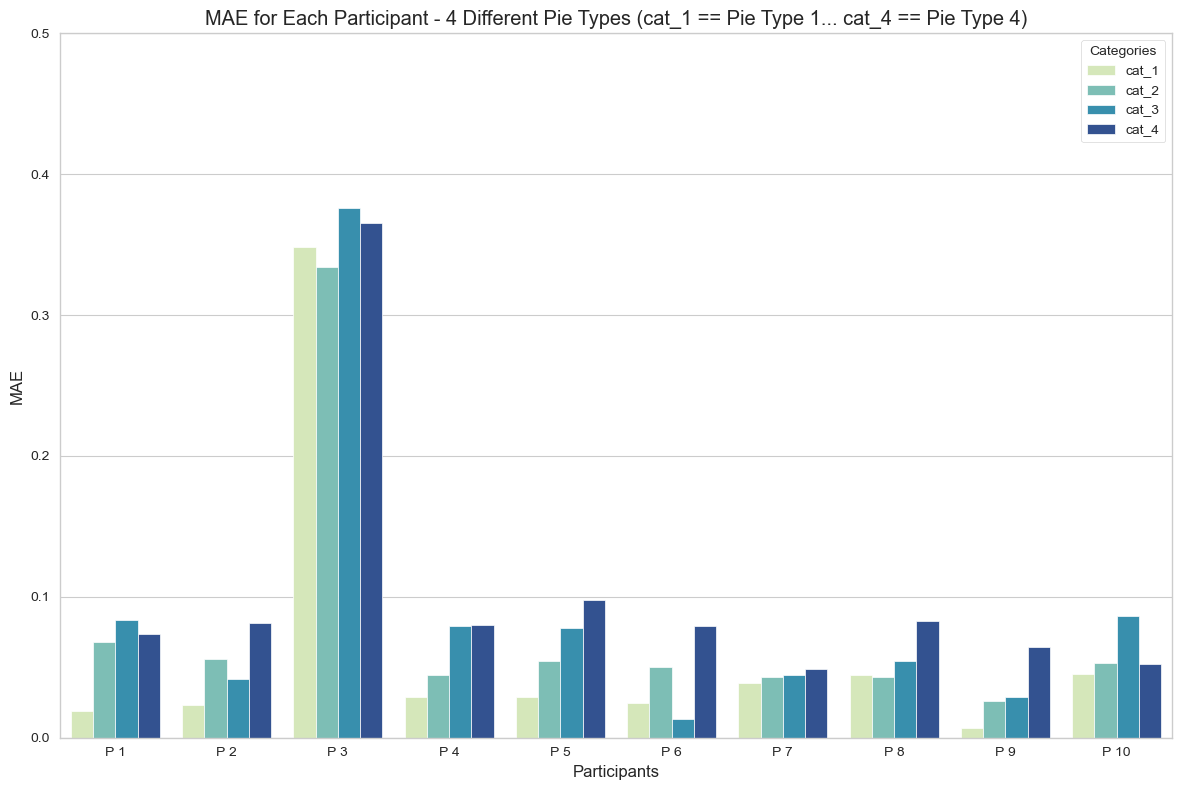

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

pie_categories = [
    ["'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"],
    ["'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'"],
    ["'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'"],
    ["'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]
]

results = []

for sub_id in range(1, 11):
    sub_results = []

    for category_index, category_names in enumerate(pie_categories):
        category_name = f"cat_{category_index + 1}"

        sub_df = df[(df['SubID'] == sub_id) & (df['selectedImageNamesArrayEXP'].isin(category_names))]

        ratings = sub_df['sliderResponsesArrayEXP'] / 100
        actual_values = sub_df['accurate_rating']
        ae = abs(ratings - actual_values)

        mae = ae.mean()
        mse = (ae ** 2).mean()
        rmse = np.sqrt(mse)

        sub_results.append({
            "Category": category_name,
            "Participant": f"P {sub_id}",
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse
        })

    results.extend(sub_results)

results_df = pd.DataFrame(results)

plt.style.use('ggplot')
sns.set_style("whitegrid")
#palette = ["b7094c", "723c70", "255e89", "0091ad", "b7094c", "723c70", "255e89"]

# grouped bar plot from seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=results_df, x='Participant', y='MAE', hue='Category', palette= 'YlGnBu')  
plt.xlabel('Participants')
plt.ylabel('MAE')
plt.title('MAE for Each Participant - 4 Different Pie Types (cat_1 == Pie Type 1... cat_4 == Pie Type 4)')
plt.xticks(rotation=0)
plt.legend(title='Categories')
plt.tight_layout()
plt.ylim(0, 0.5)
plt.show()


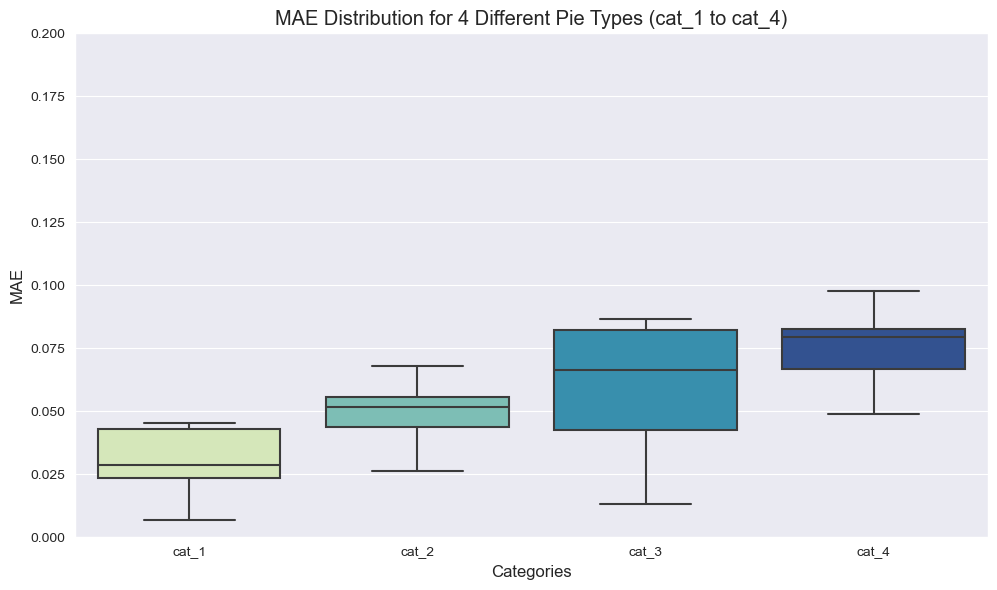

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

pie_categories = [
    ["'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"],
    ["'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'"],
    ["'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'"],
    ["'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]
]

results = []

for sub_id in range(1, 11):
    sub_results = []

    for category_index, category_names in enumerate(pie_categories):
        category_name = f"cat_{category_index + 1}"

        sub_df = df[(df['SubID'] == sub_id) & (df['selectedImageNamesArrayEXP'].isin(category_names))]

        ratings = sub_df['sliderResponsesArrayEXP'] / 100
        actual_values = sub_df['accurate_rating']
        ae = abs(ratings - actual_values)

        mae = ae.mean()

        sub_results.append({
            "Category": category_name,
            "Participant": f"P {sub_id}",
            "MAE": mae
        })

    results.extend(sub_results)

results_df = pd.DataFrame(results)

# Create boxplots for MAE for each category
plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df, x='Category', y='MAE', palette='YlGnBu')
plt.xlabel('Categories')
plt.ylabel('MAE')
plt.title('MAE Distribution for 4 Different Pie Types (cat_1 to cat_4)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.ylim(0, 0.2)
plt.show()


### For Pie type 1 are there significant differences in MAE between the proability levels? ###

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

# Category 1
category_names_category1 = ["'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"]
category_1_df = df[df['selectedImageNamesArrayEXP'].isin(category_names_category1)]

# rating groups = porb.levels
rating_groups = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]

# MAE values and corresponding probability levels for Category 1
mae_values = category_1_df['sliderResponsesArrayEXP'] / 100
probability_levels = category_1_df['accurate_rating']

# ANOVA to check for differences between rating groups
f_statistic, p_value = f_oneway(*[mae_values[probability_levels == level] for level in rating_groups])

print("One-way ANOVA results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    tukey_result = pairwise_tukeyhsd(endog=mae_values, groups=probability_levels, alpha=0.05)
    print("\nTukey's HSD Results:")
    print(tukey_result.summary())



One-way ANOVA results:
F-statistic: 80.96149407915772
P-value: 3.7262174281446164e-51

Tukey's HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
 0.125   0.25    0.109 0.0637 -0.0034 0.2214  False
 0.125  0.375    0.232    0.0  0.1196 0.3444   True
 0.125    0.5   0.3913    0.0   0.279 0.5037   True
 0.125  0.625   0.5033    0.0   0.391 0.6157   True
 0.125   0.75    0.549    0.0  0.4366 0.6614   True
 0.125  0.875    0.644    0.0  0.5316 0.7564   True
  0.25  0.375    0.123 0.0218  0.0106 0.2354   True
  0.25    0.5   0.2823    0.0    0.17 0.3947   True
  0.25  0.625   0.3943    0.0   0.282 0.5067   True
  0.25   0.75     0.44    0.0  0.3276 0.5524   True
  0.25  0.875    0.535    0.0  0.4226 0.6474   True
 0.375    0.5   0.1593 0.0007   0.047 0.2717   True
 0.375  0.625   0.2713    0.0   0.159 0.3837   True
 0.375   0.75    0.317    0.0  0.2046 0.4294   True
 0.375  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import glm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

# Category 1
category_names_category1 = ["'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"]
category_1_df = df[df['selectedImageNamesArrayEXP'].isin(category_names_category1)]
rating_groups = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]
category_1_df['RatingGroup'] = pd.Categorical(category_1_df['accurate_rating'], categories=rating_groups, ordered=True)

# GLM with Poisson family
glm_model = glm("sliderResponsesArrayEXP ~ RatingGroup", data=category_1_df, family=sm.families.Poisson())
glm_results = glm_model.fit()

print(glm_results.summary())

tukey_result = pairwise_tukeyhsd(endog=category_1_df['sliderResponsesArrayEXP'], groups=category_1_df['RatingGroup'], alpha=0.05)

# Print Tukey's HSD
print("\nTukey's HSD:")
print(tukey_result.summary())


C:\Users\Asus\AppData\Local\Temp\ipykernel_25712\2125478087.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_1_df['RatingGroup'] = pd.Categorical(category_1_df['accurate_rating'], categories=rating_groups, ordered=True)


                    Generalized Linear Model Regression Results                    
Dep. Variable:     sliderResponsesArrayEXP   No. Observations:                  210
Model:                                 GLM   Df Residuals:                      203
Model Family:                      Poisson   Df Model:                            6
Link Function:                         Log   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -1110.2
Date:                     Sat, 23 Sep 2023   Deviance:                       1069.1
Time:                             12:39:14   Pearson chi2:                     778.
No. Iterations:                          5   Pseudo R-squ. (CS):              1.000
Covariance Type:                 nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

In [98]:
import pandas as pd
import numpy as np
from tabulate import tabulate

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

pie_categories = [
    ["'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"],
    ["'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'"],
    ["'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'"],
    ["'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]
]

results = []

for sub_id in range(1, 11):
    sub_results = []

    for category_index, category_names in enumerate(pie_categories):
        category_name = f"cat_{category_index + 1}"

        sub_df = df[(df['SubID'] == sub_id) & (df['selectedImageNamesArrayEXP'].isin(category_names))]

        ratings = sub_df['sliderResponsesArrayEXP'] / 100
        actual_values = sub_df['accurate_rating']
        ae = abs(ratings - actual_values)

        mae = ae.mean()
        mse = (ae ** 2).mean()
        rmse = np.sqrt(mse)

        sub_results.append({
            "Participant": f"Participant {sub_id}",
            "Category": category_name,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse
        })

    results.extend(sub_results)

results_df = pd.DataFrame(results)

category_stats = results_df.groupby('Category').agg({
    'MAE': ['mean', 'std'],
    'MSE': ['mean', 'std'],
    'RMSE': ['mean', 'std']
}).reset_index()

category_stats.columns = ['Category', 'MAE_mean', 'MAE_std', 'MSE_mean', 'MSE_std', 'RMSE_mean', 'RMSE_std']

table_headers = ["Category", "MAE Mean", "MAE Std", "MSE Mean", "MSE Std", "RMSE Mean", "RMSE Std"]
table_data = category_stats.values.tolist()
table = tabulate(table_data, headers=table_headers, tablefmt="pretty")

print(table)


+----------+----------------------+---------------------+----------------------+----------------------+---------------------+---------------------+
| Category |       MAE Mean       |       MAE Std       |       MSE Mean       |       MSE Std        |      RMSE Mean      |      RMSE Std       |
+----------+----------------------+---------------------+----------------------+----------------------+---------------------+---------------------+
|  cat_1   | 0.060761904761904774 | 0.10181650730103696 | 0.022683333333333333 | 0.062092153948873303 | 0.08762995979505804 | 0.12911804882720412 |
|  cat_2   | 0.07738095238095238  | 0.09091850944132608 | 0.027973809523809522 | 0.059817164369327984 | 0.12175173315406007 | 0.12087792279721295 |
|  cat_3   | 0.08852380952380953  | 0.10394206625236134 | 0.03024666666666667  |  0.0662912115642989  | 0.12363935333306011 | 0.1289270981517565  |
|  cat_4   | 0.10257142857142858  | 0.09344858449471835 | 0.03346047619047619  | 0.06794063138539491  | 0.142017

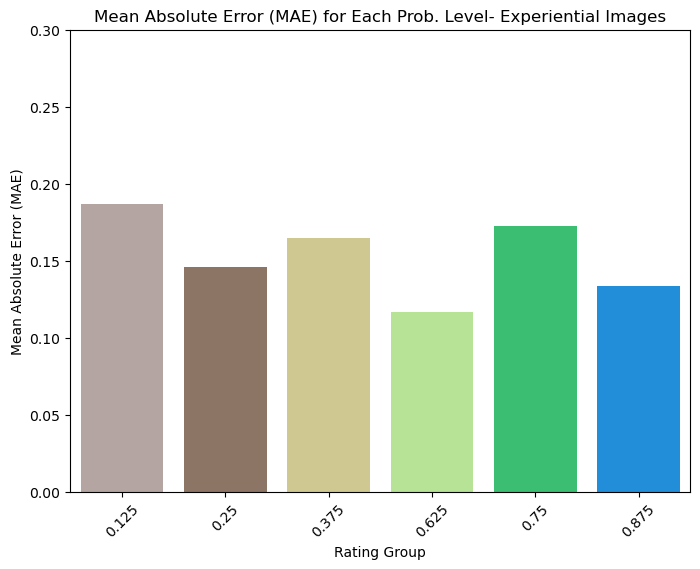

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')
rating_groups = [0.125, 0.25, 0.375, 0.625, 0.75, 0.875]  # Remove 0.5 since we'Re dealing with the images
categories = ["'Fire'", "'Cycle'", "'Menue'", "'Mark'", "'Intersection'", "'Magnet'"]
results = []

for rating in rating_groups:
    filtered_df = df[(df['accurate_rating'] == rating) & (df['selectedImageNamesArrayEXP'].isin(categories))]
    ratings = filtered_df['sliderResponsesArrayEXP'] / 100
    actual_values = filtered_df['accurate_rating']
    ae = abs(ratings - actual_values)
    results.append({
        "Category": rating,  
        "MAE": ae.mean(),
    })

results_df = pd.DataFrame(results)

#MAE for each rating group
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='MAE', data=results_df, palette="terrain_r")
plt.title('Mean Absolute Error (MAE) for Each Prob. Level- Experiential Images')
plt.xlabel('Rating Group')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks(rotation=45)
plt.ylim(0,0.3)
plt.show()


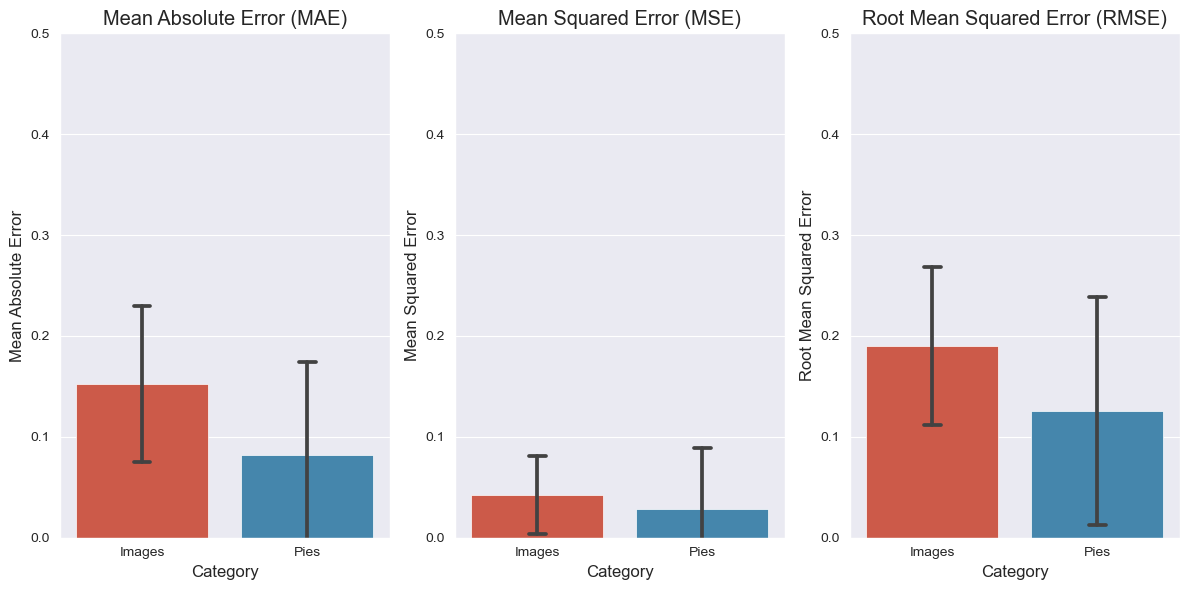

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

image_categories = [
    "'Fire'", "'Cycle'", "'Menue'", "'Mark'", "'Intersection'", "'Magnet'"
]

all_pie_categories = [
    "'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'",
    "'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'",
    "'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'",
    "'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"
]

results = []

for sub_id in range(1, 11):
    sub_results = []

    sub_df = df[df['SubID'] == sub_id]

    sub_df = sub_df.dropna(subset=['sliderResponsesArrayEXP', 'accurate_rating'])

    image_df = sub_df[sub_df['selectedImageNamesArrayEXP'].isin(image_categories)]
    image_ratings = image_df['sliderResponsesArrayEXP'] / 100
    image_actual_values = image_df['accurate_rating']

    if not image_ratings.empty:
        image_mae = mean_absolute_error(image_actual_values, image_ratings)
        image_mse = mean_squared_error(image_actual_values, image_ratings)
        image_rmse = np.sqrt(image_mse)

        sub_results.append({
            "Participant": f"Participant {sub_id}",
            "Category": "Images",
            "MAE": image_mae,
            "MSE": image_mse,
            "RMSE": image_rmse
        })

    pie_df = sub_df[sub_df['selectedImageNamesArrayEXP'].isin(all_pie_categories)]
    pie_ratings = pie_df['sliderResponsesArrayEXP'] / 100
    pie_actual_values = pie_df['accurate_rating']

    if not pie_ratings.empty:
        pie_mae = mean_absolute_error(pie_actual_values, pie_ratings)
        pie_mse = mean_squared_error(pie_actual_values, pie_ratings)
        pie_rmse = np.sqrt(pie_mse)

        sub_results.append({
            "Participant": f"Participant {sub_id}",
            "Category": "Pies",
            "MAE": pie_mae,
            "MSE": pie_mse,
            "RMSE": pie_rmse
        })

    results.extend(sub_results)

results_df = pd.DataFrame(results)

# bar plot for MAE
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.barplot(x='Category', y='MAE', data=results_df, ci='sd', capsize=0.1)
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Category')
plt.ylim(0, 0.5)
plt.ylabel('Mean Absolute Error')

#bar plot for MSE
plt.subplot(1, 3, 2)
sns.barplot(x='Category', y='MSE', data=results_df, ci='sd', capsize=0.1)
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Category')
plt.ylabel('Mean Squared Error')
plt.ylim(0, 0.5)


# bar plot for RMSE
plt.subplot(1, 3, 3)
sns.barplot(x='Category', y='RMSE', data=results_df, ci='sd', capsize=0.1)
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Category')
plt.ylabel('Root Mean Squared Error')
plt.ylim(0, 0.5)


plt.tight_layout()
plt.show()


Probability Level: 0.125, Category: Images, MAE: 0.1869047619047619
Probability Level: 0.125, Category: Pies, MAE: 0.05799999999999999
Probability Level: 0.25, Category: Images, MAE: 0.1457692307692308
Probability Level: 0.25, Category: Pies, MAE: 0.06766666666666668
Probability Level: 0.375, Category: Images, MAE: 0.16500000000000004
Probability Level: 0.375, Category: Pies, MAE: 0.07133333333333332
Probability Level: 0.5, Category: Pies, MAE: 0.05908333333333334
Probability Level: 0.625, Category: Images, MAE: 0.11666666666666665
Probability Level: 0.625, Category: Pies, MAE: 0.08441666666666665
Probability Level: 0.75, Category: Images, MAE: 0.17259259259259263
Probability Level: 0.75, Category: Pies, MAE: 0.11716666666666667
Probability Level: 0.875, Category: Images, MAE: 0.13333333333333333
Probability Level: 0.875, Category: Pies, MAE: 0.11850000000000001


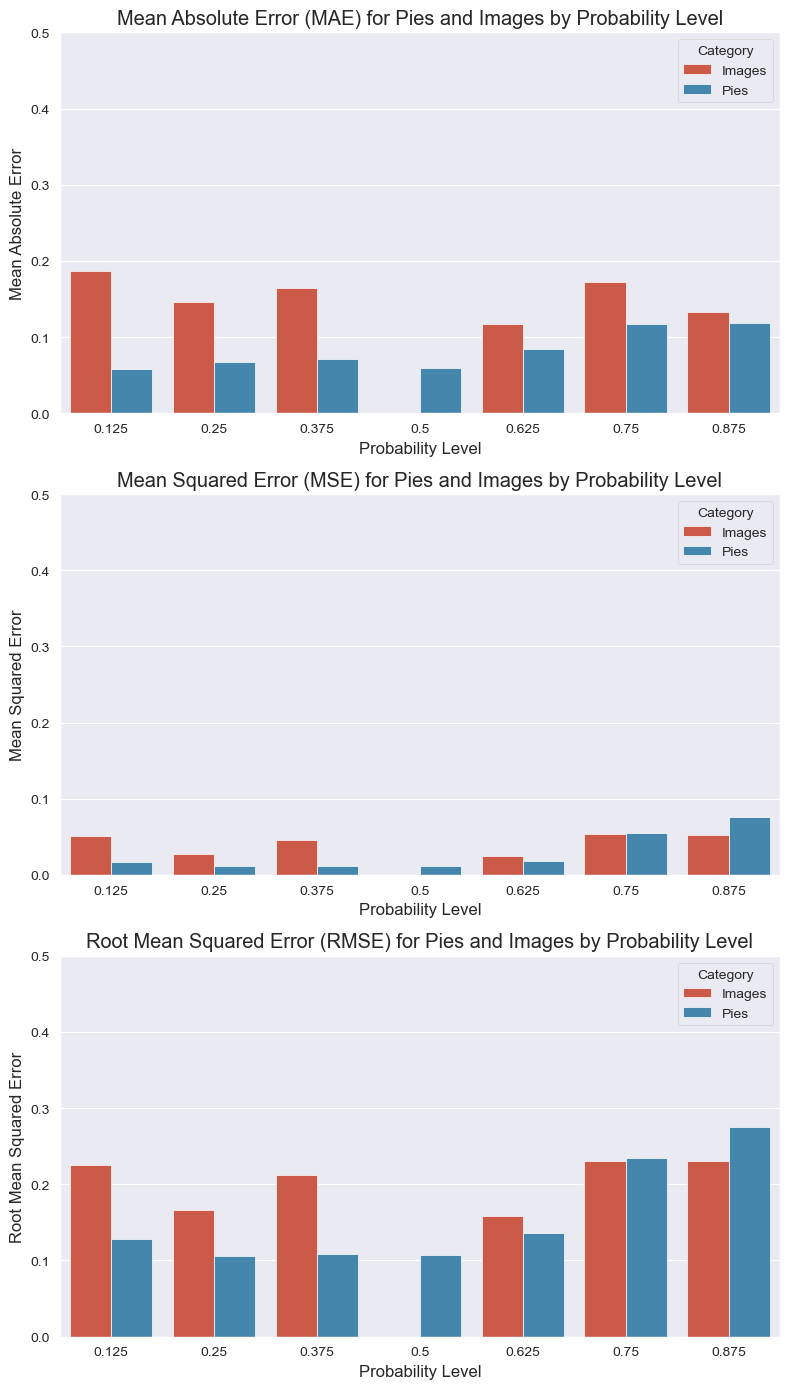

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from math import sqrt

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

image_categories = [
    "'Fire'", "'Cycle'", "'Menue'", "'Mark'", "'Intersection'", "'Magnet'"
]

all_pie_categories = [
    "'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'",
    "'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'",
    "'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'",
    "'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"
]

prob_levels = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]

results = []

for prob_level in prob_levels:
    prob_results = []

    prob_df = df[df['accurate_rating'] == prob_level]

    prob_df = prob_df.dropna(subset=['sliderResponsesArrayEXP', 'accurate_rating'])

    image_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(image_categories)]
    image_ratings = image_df['sliderResponsesArrayEXP'] / 100
    image_actual_values = image_df['accurate_rating']

    if not image_ratings.empty:
        image_mae = mean_absolute_error(image_actual_values, image_ratings)
        image_mse = mean_squared_error(image_actual_values, image_ratings)
        image_rmse = sqrt(image_mse)

        prob_results.append({
            "Probability Level": prob_level,
            "Category": "Images",
            "MAE": image_mae,
            "MSE": image_mse,
            "RMSE": image_rmse
        })

    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(all_pie_categories)]
    pie_ratings = pie_df['sliderResponsesArrayEXP'] / 100
    pie_actual_values = pie_df['accurate_rating']

    if not pie_ratings.empty:
        pie_mae = mean_absolute_error(pie_actual_values, pie_ratings)
        pie_mse = mean_squared_error(pie_actual_values, pie_ratings)
        pie_rmse = sqrt(pie_mse)

        prob_results.append({
            "Probability Level": prob_level,
            "Category": "Pies",
            "MAE": pie_mae,
            "MSE": pie_mse,
            "RMSE": pie_rmse
        })

    results.extend(prob_results)

results_df = pd.DataFrame(results)
for result in results:
    print(f"Probability Level: {result['Probability Level']}, Category: {result['Category']}, MAE: {result['MAE']}")

fig, axs = plt.subplots(3, 1, figsize=(8, 14))

# MAE
sns.barplot(x='Probability Level', y='MAE', hue='Category', data=results_df, ci='sd', capsize=0.1, ax=axs[0])
axs[0].set_title('Mean Absolute Error (MAE) for Pies and Images by Probability Level')
axs[0].set_xlabel('Probability Level')
axs[0].set_ylabel('Mean Absolute Error')
axs[0].set_ylim(0, 0.5)
axs[0].legend(title='Category')

# MSE
sns.barplot(x='Probability Level', y='MSE', hue='Category', data=results_df, ci='sd', capsize=0.1, ax=axs[1])
axs[1].set_title('Mean Squared Error (MSE) for Pies and Images by Probability Level')
axs[1].set_xlabel('Probability Level')
axs[1].set_ylabel('Mean Squared Error')
axs[1].set_ylim(0, 0.5)
axs[1].legend(title='Category')

# RMSE
sns.barplot(x='Probability Level', y='RMSE', hue='Category', data=results_df, ci='sd', capsize=0.1, ax=axs[2])
axs[2].set_title('Root Mean Squared Error (RMSE) for Pies and Images by Probability Level')
axs[2].set_xlabel('Probability Level')
axs[2].set_ylabel('Root Mean Squared Error')
axs[2].set_ylim(0, 0.5)
axs[2].legend(title='Category')

plt.tight_layout()
plt.show()


In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')
prob_levels = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]
results = []

for prob_level in prob_levels:
    prob_results = []
    prob_df = df[df['accurate_rating'] == prob_level]
    prob_df = prob_df.dropna(subset=['sliderResponsesArrayEXP', 'accurate_rating'])

    # RMSE for pies
    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(all_pie_categories)]
    pie_ratings = pie_df['sliderResponsesArrayEXP'] / 100
    pie_actual_values = pie_df['accurate_rating']

    if not pie_ratings.empty:
        pie_rmse = mean_squared_error(pie_actual_values, pie_ratings, squared=False)

        prob_results.append({
            "Probability_Level": prob_level,
            "RMSE": pie_rmse
        })

    results.extend(prob_results)

for result in results:
    print(f"Probability Level: {result['Probability_Level']}, RMSE: {result['RMSE']}")
results_df = pd.DataFrame(results)

# Kruskal-Wallis test
kruskal_result = kruskal(*[group['RMSE'] for name, group in results_df.groupby('Probability_Level')])
print("Kruskal-Wallis Test:")
print(kruskal_result)

# Dunn's post-hoc test
posthoc_dunn_result = posthoc_dunn(results_df, val_col='RMSE', group_col='Probability_Level')
print("Dunn's Post-Hoc Test:")
print(posthoc_dunn_result)


Probability Level: 0.125, RMSE: 0.1285755290351421
Probability Level: 0.25, RMSE: 0.10586941642104832
Probability Level: 0.375, RMSE: 0.10818194550539999
Probability Level: 0.5, RMSE: 0.10707084881827857
Probability Level: 0.625, RMSE: 0.13575713609236165
Probability Level: 0.75, RMSE: 0.23497517599383413
Probability Level: 0.875, RMSE: 0.274930294195941
Kruskal-Wallis Test:
KruskalResult(statistic=6.0, pvalue=0.42319008112684364)
Dunn's Post-Hoc Test:
          0.125     0.250     0.375     0.500     0.625     0.750     0.875
0.125  1.000000  0.326109  0.743421  0.512691  0.743421  0.512691  0.326109
0.250  0.326109  1.000000  0.512691  0.743421  0.190430  0.101707  0.049535
0.375  0.743421  0.512691  1.000000  0.743421  0.512691  0.326109  0.190430
0.500  0.512691  0.743421  0.743421  1.000000  0.326109  0.190430  0.101707
0.625  0.743421  0.190430  0.512691  0.326109  1.000000  0.743421  0.512691
0.750  0.512691  0.101707  0.326109  0.190430  0.743421  1.000000  0.743421
0.875  0.32

#### is there a sig. dif. between pie and iamge MAE for prob == 0.125 ####

In [178]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
from scipy.stats import mannwhitneyu
from tabulate import tabulate

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')
image_categories = [
    "'Fire'", "'Cycle'", "'Menue'", "'Mark'", "'Intersection'", "'Magnet'"
]

all_pie_categories = [
    "'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'",
    "'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'",
    "'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'",
    "'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"
]

prob_levels = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]
mae_results = []
mannwhitney_results = []

for prob_level in prob_levels:
    prob_df = df[df['accurate_rating'] == prob_level]

    prob_df = prob_df.dropna(subset=['sliderResponsesArrayEXP', 'accurate_rating'])

    image_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(image_categories)]
    image_ratings = image_df['sliderResponsesArrayEXP'] / 100
    image_actual_values = image_df['accurate_rating']

    if not image_ratings.empty:
        image_mae = mean_absolute_error(image_actual_values, image_ratings)

        mae_results.append({
            "Probability Level": prob_level,
            "Category": "Images",
            "MAE": image_mae
        })

    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(all_pie_categories)]
    pie_ratings = pie_df['sliderResponsesArrayEXP'] / 100
    pie_actual_values = pie_df['accurate_rating']

    if not pie_ratings.empty:
        pie_mae = mean_absolute_error(pie_actual_values, pie_ratings)

        mae_results.append({
            "Probability Level": prob_level,
            "Category": "Pies",
            "MAE": pie_mae
        })

    # Mann-Whitney U test between pies and images for the current probability level
    pies_data = pie_df['sliderResponsesArrayEXP'] / 100
    images_data = image_df['sliderResponsesArrayEXP'] / 100

    if len(pies_data) > 1 and len(images_data) > 1:
        statistic, p_value = mannwhitneyu(pies_data, images_data, alternative='two-sided')

        alpha = 0.05  
        if p_value < alpha:
            significance = "Yes"
        else:
            significance = "No"

        mannwhitney_results.append({
            "Probability Level": prob_level,
            "Statistic": statistic,
            "P-value": p_value,
            "Statistically Significant": significance
        })

mae_table = pd.DataFrame(mae_results)

mannwhitney_table = pd.DataFrame(mannwhitney_results)

print("\nMean Absolute Error (MAE) Results for Different Probability Levels:")
print(tabulate(mae_table, headers="keys", tablefmt="grid"))

print("\nMann-Whitney U Test Results (Pies vs. Images) for Different Probability Levels:")
print(tabulate(mannwhitney_table, headers="keys", tablefmt="grid"))



Mean Absolute Error (MAE) Results for Different Probability Levels:
+----+---------------------+------------+-----------+
|    |   Probability Level | Category   |       MAE |
+====+=====================+============+===========+
|  0 |               0.125 | Images     | 0.186905  |
+----+---------------------+------------+-----------+
|  1 |               0.125 | Pies       | 0.058     |
+----+---------------------+------------+-----------+
|  2 |               0.25  | Images     | 0.145769  |
+----+---------------------+------------+-----------+
|  3 |               0.25  | Pies       | 0.0676667 |
+----+---------------------+------------+-----------+
|  4 |               0.375 | Images     | 0.165     |
+----+---------------------+------------+-----------+
|  5 |               0.375 | Pies       | 0.0713333 |
+----+---------------------+------------+-----------+
|  6 |               0.5   | Pies       | 0.0590833 |
+----+---------------------+------------+-----------+
|  7 |       

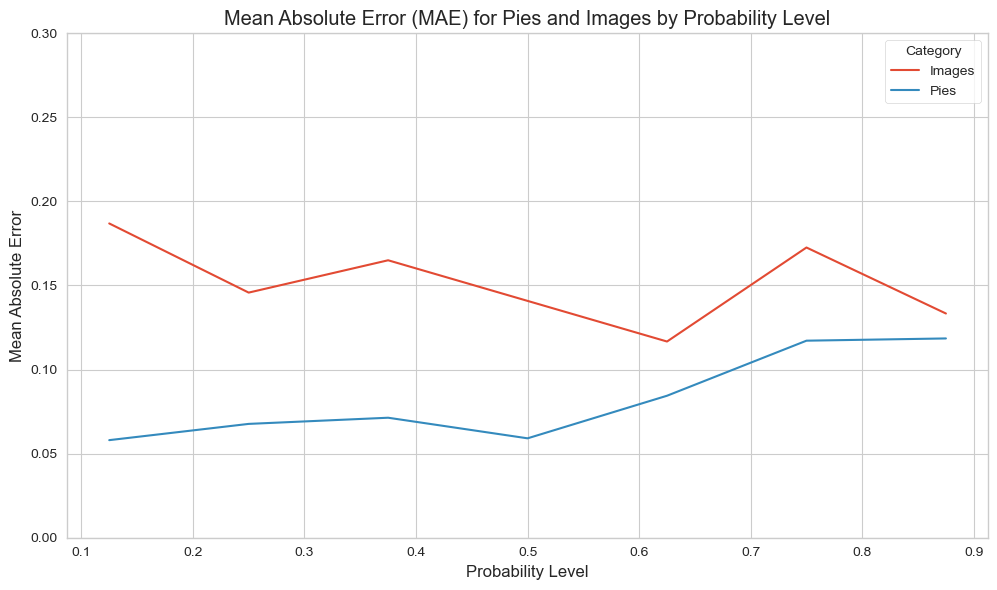

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

image_categories = [
    "'Fire'", "'Cycle'", "'Menue'", "'Mark'", "'Intersection'", "'Magnet'"
]

all_pie_categories = [
    "'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'",
    "'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'",
    "'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'",
    "'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"
]

prob_levels = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]

results = []

for prob_level in prob_levels:
    prob_results = []

    prob_df = df[df['accurate_rating'] == prob_level]

    prob_df = prob_df.dropna(subset=['sliderResponsesArrayEXP', 'accurate_rating'])

    image_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(image_categories)]
    image_ratings = image_df['sliderResponsesArrayEXP'] / 100
    image_actual_values = image_df['accurate_rating']

    if not image_ratings.empty:
        image_mae = mean_absolute_error(image_actual_values, image_ratings)

        prob_results.append({
            "Probability Level": prob_level,
            "Category": "Images",
            "MAE": image_mae
        })

    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(all_pie_categories)]
    pie_ratings = pie_df['sliderResponsesArrayEXP'] / 100
    pie_actual_values = pie_df['accurate_rating']

    if not pie_ratings.empty:
        pie_mae = mean_absolute_error(pie_actual_values, pie_ratings)

        prob_results.append({
            "Probability Level": prob_level,
            "Category": "Pies",
            "MAE": pie_mae
        })

    results.extend(prob_results)

results_df = pd.DataFrame(results)

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(x='Probability Level', y='MAE', hue='Category', data=results_df, ci='sd', markers=True)
plt.title('Mean Absolute Error (MAE) for Pies and Images by Probability Level')
plt.xlabel('Probability Level')
plt.ylabel('Mean Absolute Error')
plt.ylim(0, 0.5)
plt.legend(title='Category')
plt.tight_layout()
plt.ylim(0, 0.3)
plt.show()


In [187]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np
from scipy.stats import mannwhitneyu

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')

image_categories = [
    "'Fire'", "'Cycle'", "'Menue'", "'Mark'", "'Intersection'", "'Magnet'"
]

all_pie_categories = [
    "'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'",
    "'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'",
    "'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'",
    "'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"
]

# probability levels excluding 0.5 as images don't have that option
prob_levels = [0.125, 0.25, 0.375, 0.625, 0.75, 0.875]

results = []

for prob_level in prob_levels:
    prob_results = []

    prob_df = df[df['accurate_rating'] == prob_level]

    prob_df = prob_df.dropna(subset=['sliderResponsesArrayEXP', 'accurate_rating'])

    # MAE for all image categories 
    image_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(image_categories)]
    image_ratings = image_df['sliderResponsesArrayEXP'] / 100
    image_actual_values = image_df['accurate_rating']

    # MAE for all pie categories 
    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(all_pie_categories)]
    pie_ratings = pie_df['sliderResponsesArrayEXP'] / 100
    pie_actual_values = pie_df['accurate_rating']

    if not image_ratings.empty and not pie_ratings.empty:
        statistic, p_value = mannwhitneyu(image_ratings, pie_ratings, alternative='two-sided')

        prob_results.append({
            "Probability Level": prob_level,
            "Comparison": "Images vs. Pies",
            "P-value": p_value
        })

    results.extend(prob_results)

results_df = pd.DataFrame(results)

print(results_df)


   Probability Level       Comparison   P-value
0              0.125  Images vs. Pies  0.000002
1              0.250  Images vs. Pies  0.000085
2              0.375  Images vs. Pies  0.217911
3              0.625  Images vs. Pies  0.675238
4              0.750  Images vs. Pies  0.027310
5              0.875  Images vs. Pies  0.000036


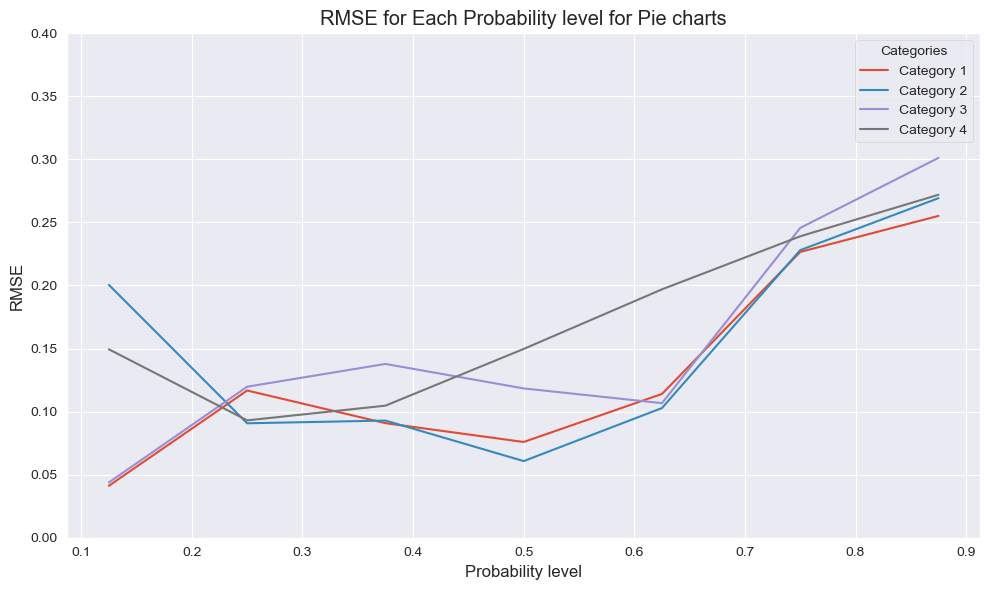

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn

df = pd.read_csv('Participant_1_10_Data_Kopie.csv', sep=';')
category1 = ["'Pie11'", "'Pie12'", "'Pie13'", "'Pie14'", "'Pie15'", "'Pie16'", "'Pie17'"]
category2 = ["'Pie21'", "'Pie22'", "'Pie23'", "'Pie24'", "'Pie25'", "'Pie26'", "'Pie27'"]
category3 = ["'Pie31'", "'Pie32'", "'Pie33'", "'Pie34'", "'Pie35'", "'Pie36'", "'Pie37'"]
category4 = ["'Pie41'", "'Pie42'", "'Pie43'", "'Pie44'", "'Pie45'", "'Pie46'", "'Pie47'"]
prob_levels = [0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875]

results_category1 = []
results_category2 = []
results_category3 = []
results_category4 = []

for prob_level in prob_levels:
    prob_results_category1 = []
    prob_results_category2 = []
    prob_results_category3 = []
    prob_results_category4 = []

    prob_df = df[df['accurate_rating'] == prob_level]
    prob_df = prob_df.dropna(subset=['sliderResponsesArrayEXP', 'accurate_rating'])

    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(category1)]
    pie_ratings = pie_df['sliderResponsesArrayEXP'] / 100
    pie_actual_values = pie_df['accurate_rating']

    if not pie_ratings.empty:
        ae = abs(pie_ratings - pie_actual_values)
        mse = (ae ** 2).mean()
        rmse = np.sqrt(mse)
        prob_results_category1.append({
            "Probability_Level": prob_level,
            "RMSE": rmse
        })

    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(category2)]
    pie_ratings = pie_df['sliderResponsesArrayEXP'] / 100
    pie_actual_values = pie_df['accurate_rating']

    if not pie_ratings.empty:
        ae = abs(pie_ratings - pie_actual_values)
        mse = (ae ** 2).mean()
        rmse = np.sqrt(mse)
        prob_results_category2.append({
            "Probability_Level": prob_level,
            "RMSE": rmse
        })

    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(category3)]
    pie_ratings = pie_df['sliderResponsesArrayEXP'] / 100
    pie_actual_values = pie_df['accurate_rating']

    if not pie_ratings.empty:
        ae = abs(pie_ratings - pie_actual_values)
        mse = (ae ** 2).mean()
        rmse = np.sqrt(mse)
        prob_results_category3.append({
            "Probability_Level": prob_level,
            "RMSE": rmse
        })


    pie_df = prob_df[prob_df['selectedImageNamesArrayEXP'].isin(category4)]
    pie_ratings = pie_df['sliderResponsesArrayEXP'] / 100
    pie_actual_values = pie_df['accurate_rating']

    if not pie_ratings.empty:
        ae = abs(pie_ratings - pie_actual_values)
        mse = (ae ** 2).mean()
        rmse = np.sqrt(mse)
        prob_results_category4.append({
            "Probability_Level": prob_level,
            "RMSE": rmse
        })

    
    results_category1.extend(prob_results_category1)
    results_category2.extend(prob_results_category2)
    results_category3.extend(prob_results_category3)
    results_category4.extend(prob_results_category4)

results_df_category1 = pd.DataFrame(results_category1)
results_df_category2 = pd.DataFrame(results_category2)
results_df_category3 = pd.DataFrame(results_category3)
results_df_category4 = pd.DataFrame(results_category4)

# RMSE for all categories on one plot
plt.style.use('ggplot')
sns.set_style("darkgrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df_category1, x='Probability_Level', y='RMSE', label='Category 1', palette='bright')
sns.lineplot(data=results_df_category2, x='Probability_Level', y='RMSE', label='Category 2', palette='bright')
sns.lineplot(data=results_df_category3, x='Probability_Level', y='RMSE', label='Category 3', palette='bright')
sns.lineplot(data=results_df_category4, x='Probability_Level', y='RMSE', label='Category 4', palette='bright')

plt.xlabel('Probability level')
plt.ylabel('RMSE')
plt.title('RMSE for Each Probability level for Pie charts')
plt.xticks(rotation=0)
plt.legend(title='Categories')
plt.tight_layout()
plt.ylim(0, 0.4)
plt.show()
